In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime 

In [3]:
dairy = pd.read_csv("../DairyGoods/dairy_dataset.csv")
dairy.head(5)

Location  Total Land Area (acres)  Number of Cows Farm Size  \
0      Telangana                   310.84              96    Medium   
1  Uttar Pradesh                    19.19              44     Large   
2     Tamil Nadu                   581.69              24    Medium   
3      Telangana                   908.00              89     Small   
4    Maharashtra                   861.95              21    Medium   

         Date  Product ID Product Name                 Brand  \
0  2022-02-17           5    Ice Cream           Dodla Dairy   
1  2021-12-01           1         Milk                  Amul   
2  2022-02-28           4       Yogurt           Dodla Dairy   
3  2019-06-09           3       Cheese  Britannia Industries   
4  2020-12-14           8   Buttermilk          Mother Dairy   

   Quantity (liters/kg)  Price per Unit  ...  Production Date  \
0                222.40           85.72  ...       2021-12-27   
1                687.48           42.61  ...       2021-10-03   
2                503.48           36.50  ...       2022-01-14   
3                823.36           26.52  ...       2019-05-15   
4                147.77           83.85  ...       2020-10-17   

   Expiration Date Quantity Sold (liters/kg) Price per Unit (sold)  \
0       2022-01-21                         7                 82.24   
1       2021-10-25                       558                 39.24   
2       2022-02-13                       256                 33.81   
3       2019-07-26                       601                 28.92   
4       2020-10-28                       145                 83.07   

  Approx. Total Revenue(INR)  Customer Location  Sales Channel  \
0                     575.68     Madhya Pradesh      Wholesale   
1                   21895.92             Kerala      Wholesale   
2                    8655.36     Madhya Pradesh         Online   
3                   17380.92          Rajasthan         Online   
4                   12045.15          Jharkhand         Retail   

   Quantity in Stock (liters/kg) Minimum Stock Threshold (liters/kg)  \
0                            215                               19.55   
1                            129                               43.17   
2                            247                               15.10   
3                            222                               74.50   
4                              2                               76.02   

  Reorder Quantity (liters/kg)  
0                        64.03  
1                       181.10  
2                       140.83  
3                        57.68  
4                        33.40  

[5 rows x 23 columns]

In [4]:

print("The columns of the dairy dataset are", dairy.columns)

The columns of the dairy dataset are Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Date', 'Product ID', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')


In [5]:
dairy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

Plotting simple univariate data

Text(0.5, 1.0, 'Product ID frequencies')

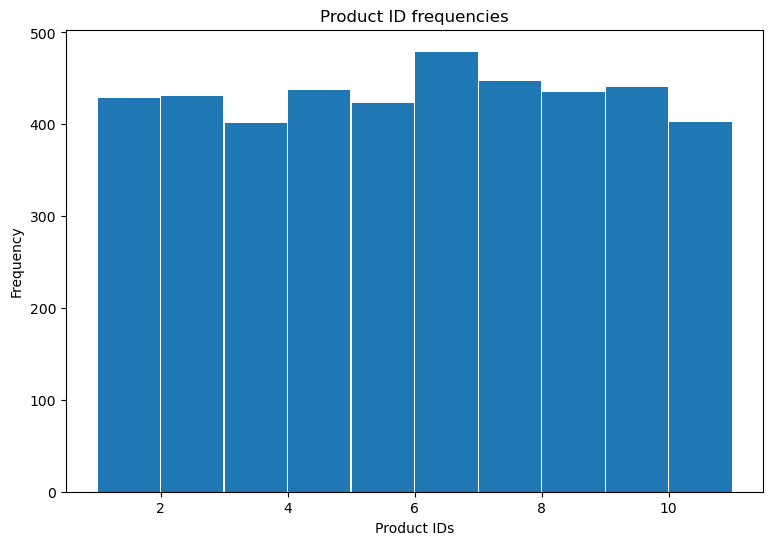

In [6]:
## Plotting product IDs

plt.figure(figsize = (9,6))

plt.hist(dairy['Product ID'], 
                bins = 10, 
                range = (1, 11),
                align = 'mid',
                rwidth = 0.98)
plt.xlabel("Product IDs")
plt.ylabel("Frequency")

plt.title("Product ID frequencies")

In [7]:
dairy['Farm Size'].unique()

array(['Medium', 'Large', 'Small'], dtype=object)

In [8]:
## Function for creating dictionaries with categorical counts
def countscreate(df, cat):
    counts = {}
    for i in range(len(df)):
        if df[cat][i] in counts:
            counts[df[cat][i]] = counts[df[cat][i]] + 1
        else: 
            counts[df[cat][i]] = 1
    return counts

def propcreate(df, cat):
    counts = countscreate(df, cat)
    counts_prop = counts
    quant = df[cat].unique()
    for i in range(len(quant)):
        counts_prop[quant[i]] = counts[quant[i]]/len(df)


<Figure size 4000x4000 with 0 Axes>

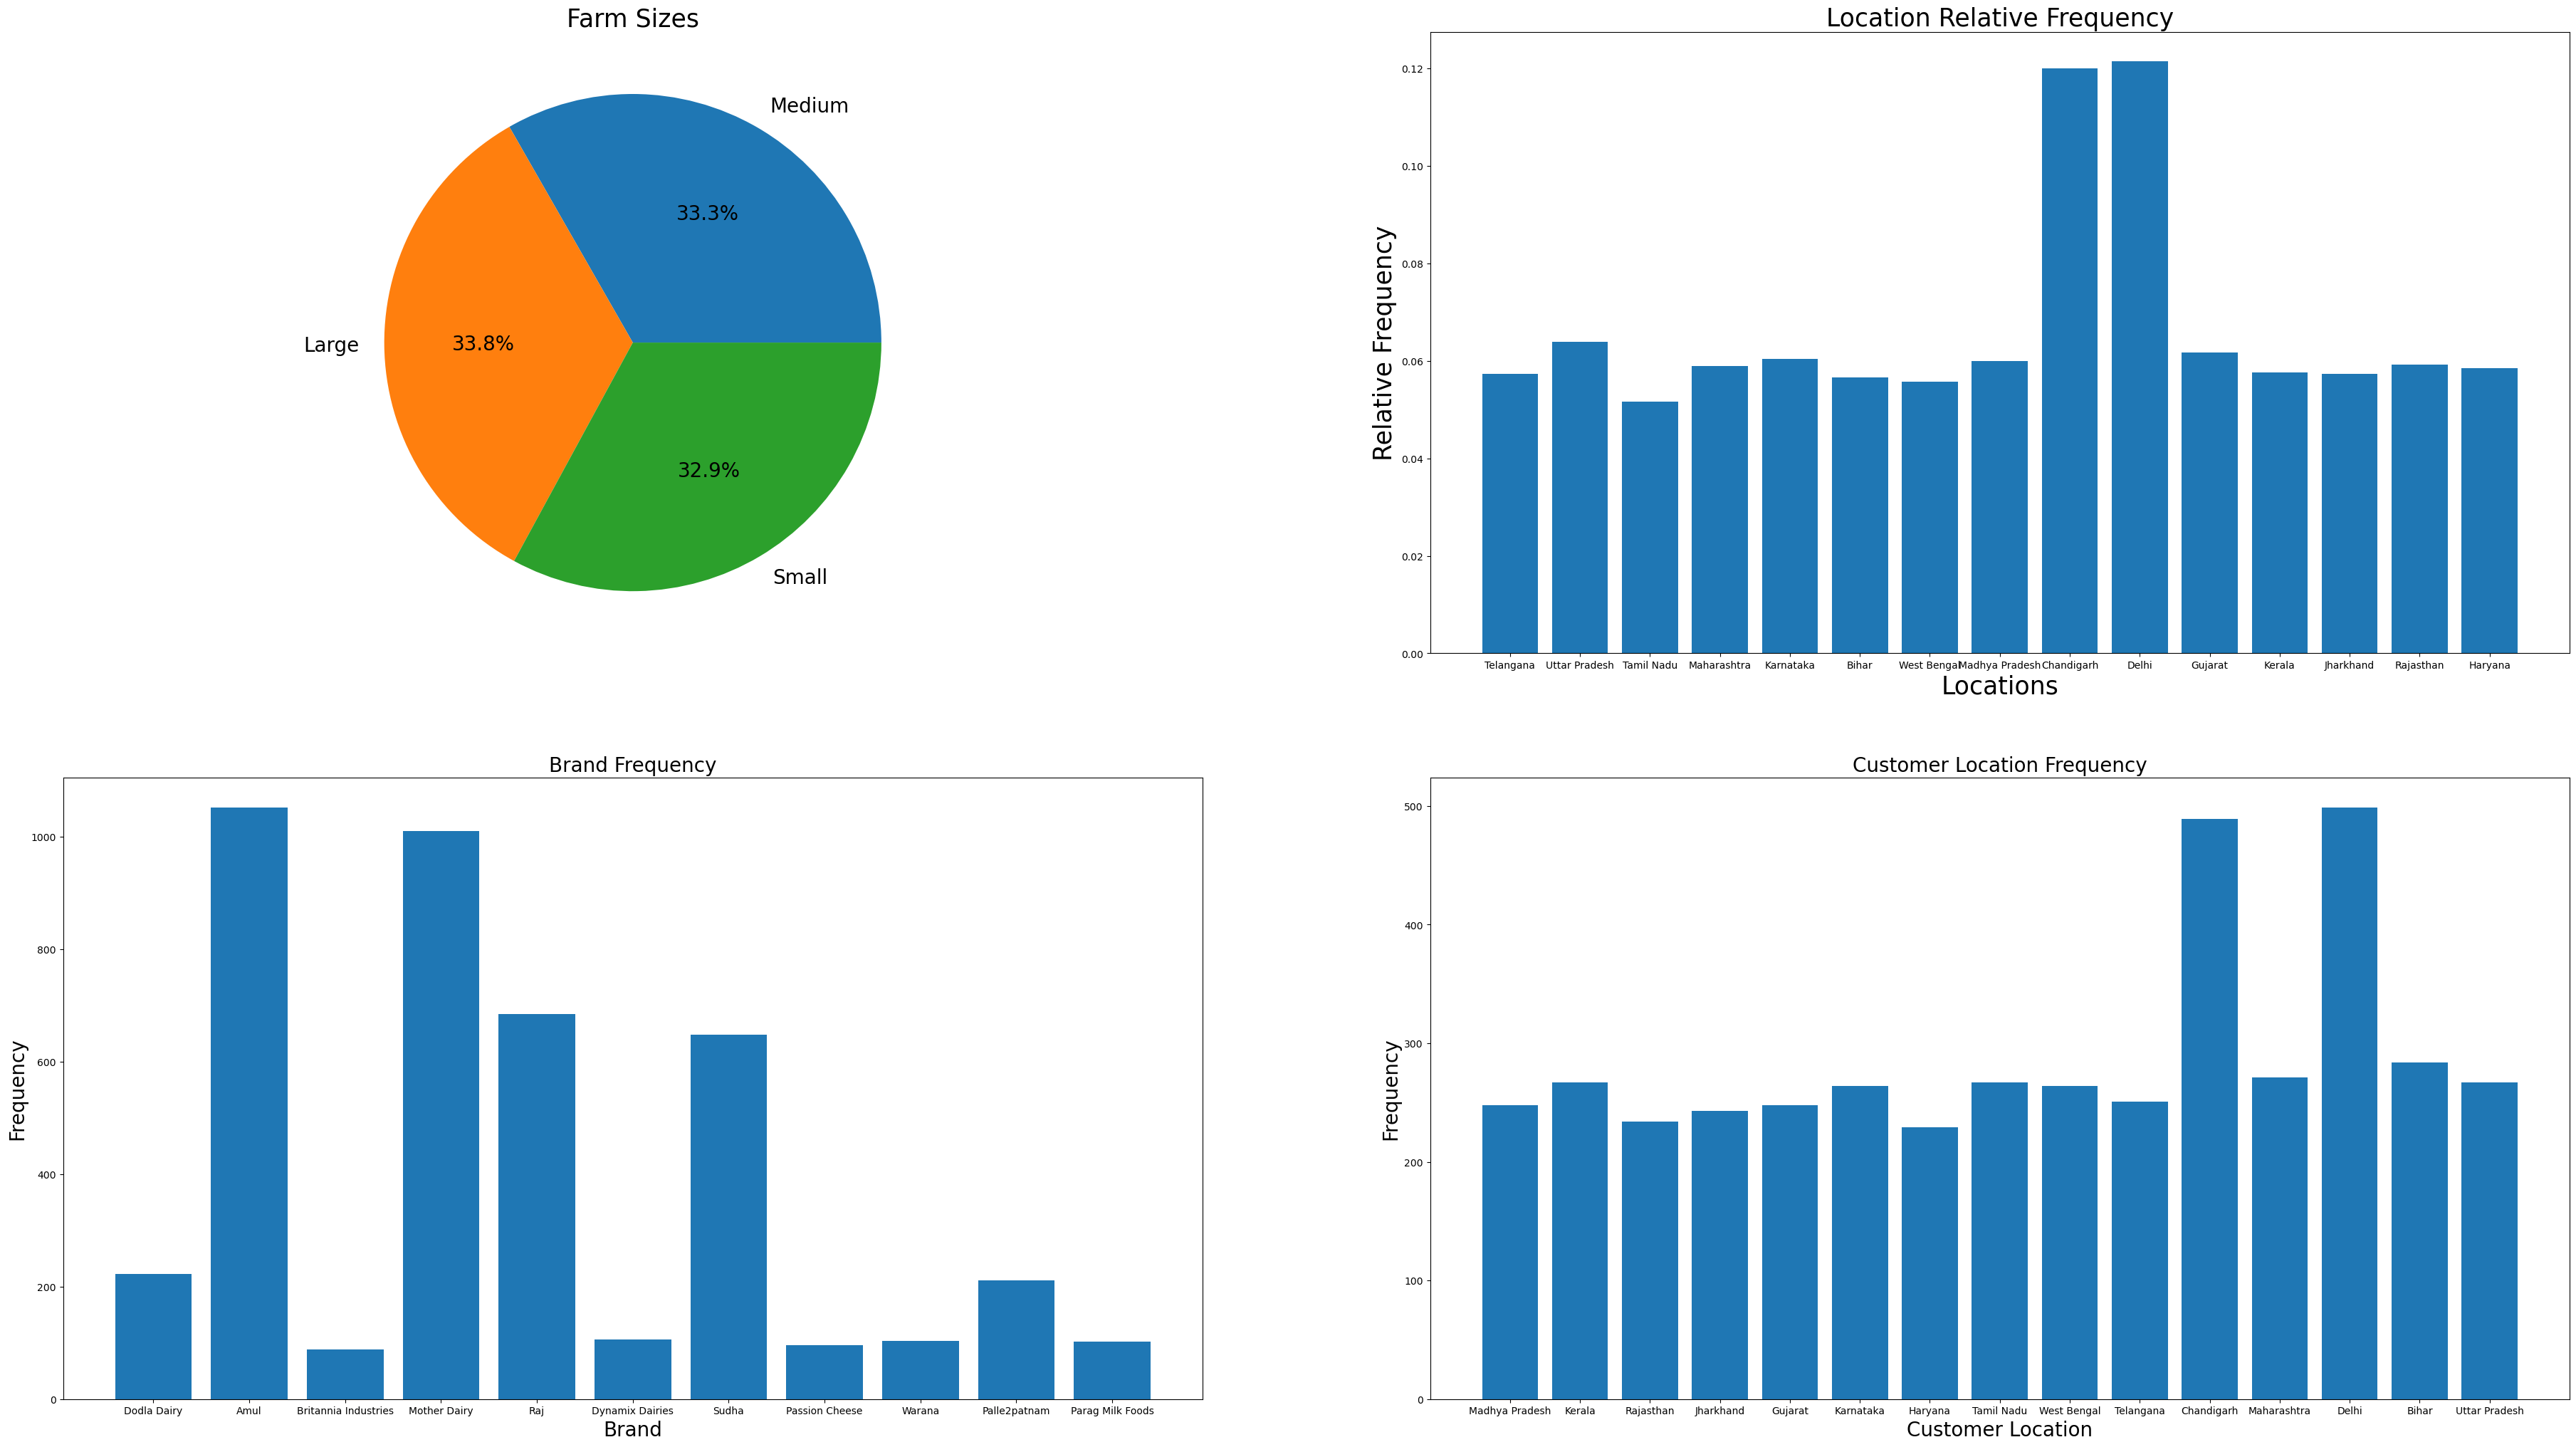

In [9]:
## Plotting some of univariate visualizations of categorical data - farm size, location, brand, and customer location

plt.figure(figsize = (40,40))
fig, axs = plt.subplots(nrows = 2, ncols = 2)

## Farm Size
farmsizes = {}
for i in range(len(dairy)):
    if dairy['Farm Size'][i] in farmsizes:
        farmsizes[dairy['Farm Size'][i]] = farmsizes[dairy['Farm Size'][i]] + 1
    else: 
        farmsizes[dairy['Farm Size'][i]] = 1
farmsize_prop = farmsizes
sizes = dairy['Farm Size'].unique()
for i in range(len(sizes)):
    farmsize_prop[sizes[i]] = farmsizes[sizes[i]]/len(dairy)
axs[0,0].pie(farmsize_prop.values(), 
            labels = dairy['Farm Size'].unique(),
            autopct = '%1.1f%%',
            textprops = {'fontsize' : 20})
axs[0,0].set_title("Farm Sizes", fontsize = 25)

## Location
location = {}
for i in range(len(dairy)):
    if dairy['Location'][i] in location:
        location[dairy['Location'][i]] = location[dairy['Location'][i]] + 1
    else: 
        location[dairy['Location'][i]] = 1
location_prop = location
locations = dairy['Location'].unique()
for i in range(len(locations)):
    location_prop[locations[i]] = location[locations[i]]/len(dairy)
axs[0,1].bar(locations, location_prop.values())
axs[0,1].set_title("Location Relative Frequency", fontsize = 25)
axs[0,1].set_xlabel("Locations", fontsize = 25)
axs[0,1].set_ylabel("Relative Frequency", fontsize = 25)

## Brand 
brand = countscreate(dairy, 'Brand')
brands = dairy['Brand'].unique()
axs[1,0].bar(brands, brand.values())
axs[1,0].set_xlabel('Brand', fontsize = 20)
axs[1,0].set_ylabel('Frequency', fontsize = 20)
axs[1,0].set_title('Brand Frequency', fontsize = 20)

## Customer Location
custloc = countscreate(dairy, 'Customer Location')
custlocs = dairy['Customer Location'].unique()
axs[1,1].bar(custlocs, custloc.values())
axs[1,1].set_xlabel('Customer Location', fontsize = 20)
axs[1,1].set_ylabel('Frequency', fontsize = 20)
axs[1,1].set_title('Customer Location Frequency', fontsize = 20)

plt.subplots_adjust(left = 0.5, right = 6, top = 5, bottom = 1)


# Univariate Quantitative Data

<Axes: xlabel='Minimum Stock Threshold (liters/kg)', ylabel='Count'>

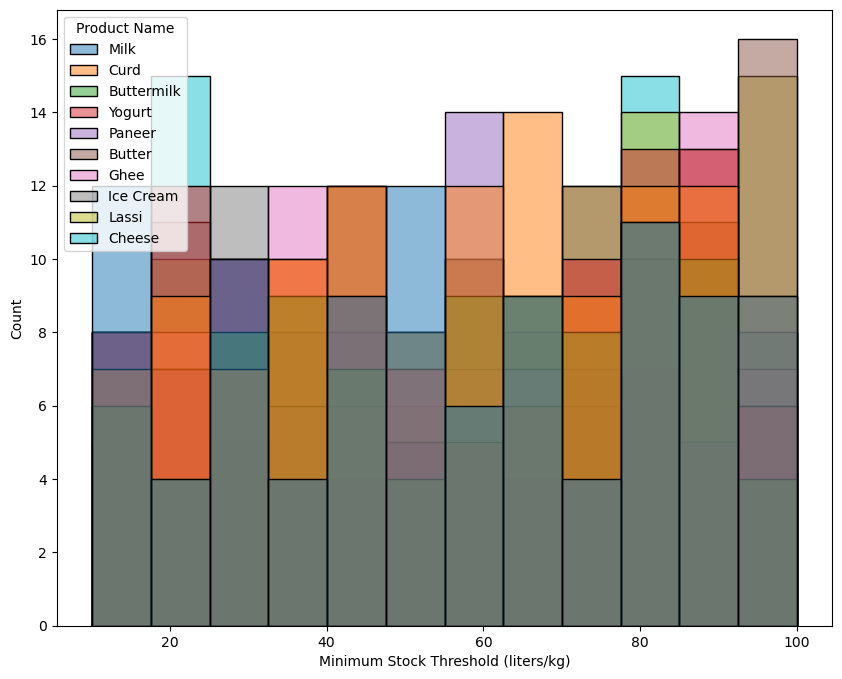

In [10]:
## Minimum Stock Threshold
plt.figure(figsize = (10,8))

sns.histplot(data = dairy[dairy['Brand'] == 'Amul'],
            x = 'Minimum Stock Threshold (liters/kg)',
            hue = 'Product Name')


# Bivariate Quantitative Data

In [11]:
dairy.head()

Location  Total Land Area (acres)  Number of Cows Farm Size  \
0      Telangana                   310.84              96    Medium   
1  Uttar Pradesh                    19.19              44     Large   
2     Tamil Nadu                   581.69              24    Medium   
3      Telangana                   908.00              89     Small   
4    Maharashtra                   861.95              21    Medium   

         Date  Product ID Product Name                 Brand  \
0  2022-02-17           5    Ice Cream           Dodla Dairy   
1  2021-12-01           1         Milk                  Amul   
2  2022-02-28           4       Yogurt           Dodla Dairy   
3  2019-06-09           3       Cheese  Britannia Industries   
4  2020-12-14           8   Buttermilk          Mother Dairy   

   Quantity (liters/kg)  Price per Unit  ...  Production Date  \
0                222.40           85.72  ...       2021-12-27   
1                687.48           42.61  ...       2021-10-03   
2                503.48           36.50  ...       2022-01-14   
3                823.36           26.52  ...       2019-05-15   
4                147.77           83.85  ...       2020-10-17   

   Expiration Date Quantity Sold (liters/kg) Price per Unit (sold)  \
0       2022-01-21                         7                 82.24   
1       2021-10-25                       558                 39.24   
2       2022-02-13                       256                 33.81   
3       2019-07-26                       601                 28.92   
4       2020-10-28                       145                 83.07   

  Approx. Total Revenue(INR)  Customer Location  Sales Channel  \
0                     575.68     Madhya Pradesh      Wholesale   
1                   21895.92             Kerala      Wholesale   
2                    8655.36     Madhya Pradesh         Online   
3                   17380.92          Rajasthan         Online   
4                   12045.15          Jharkhand         Retail   

   Quantity in Stock (liters/kg) Minimum Stock Threshold (liters/kg)  \
0                            215                               19.55   
1                            129                               43.17   
2                            247                               15.10   
3                            222                               74.50   
4                              2                               76.02   

  Reorder Quantity (liters/kg)  
0                        64.03  
1                       181.10  
2                       140.83  
3                        57.68  
4                        33.40  

[5 rows x 23 columns]

In [106]:
dairy.columns

Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Date', 'Product ID', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)', 'Normalized Approx. Total Rev',
       'Production to Expiration', 'Season'],
      dtype='object')

Text(0.5, 1.0, 'Total Land Area vs. Minimum Stock Threshold (for Amul)')

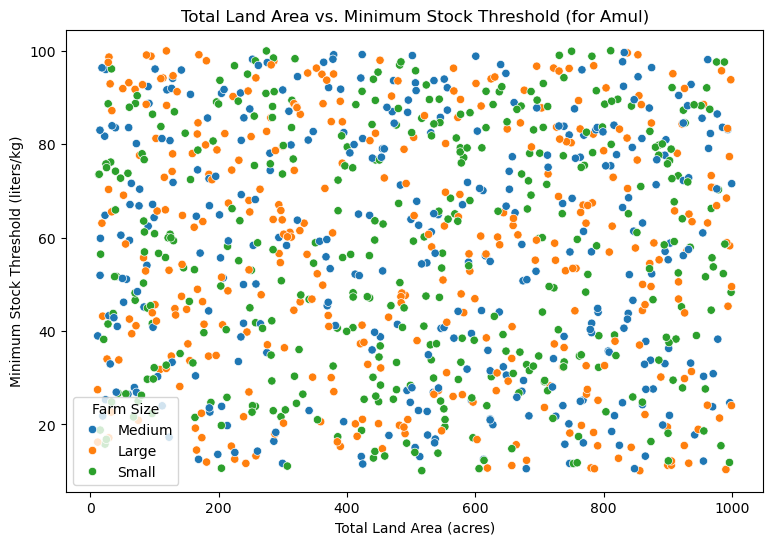

In [12]:
## Total Land Area vs. Minimum Stock Threshold

plt.figure(figsize = (9,6))

sns.scatterplot(x = dairy[dairy['Brand'] == 'Amul']['Total Land Area (acres)'],
                y = dairy['Minimum Stock Threshold (liters/kg)'],
                hue = dairy['Farm Size'])
plt.title("Total Land Area vs. Minimum Stock Threshold (for Amul)")


Text(0.5, 1.0, 'Shelf Life vs. Quantity Sold (days)')

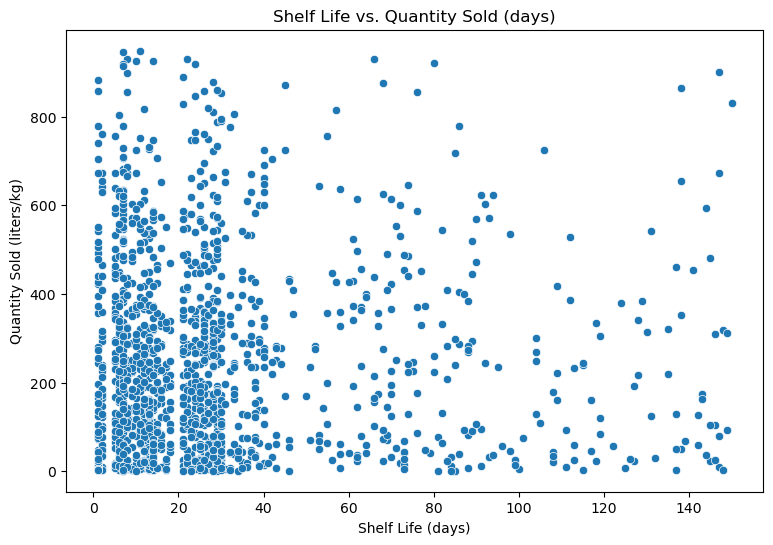

In [13]:
## Shelf Life vs. Quantity Sold
plt.figure(figsize = (9,6))

sns.scatterplot(x = dairy[dairy['Farm Size'] == 'Small']['Shelf Life (days)'],
                y = dairy['Quantity Sold (liters/kg)'])
plt.title("Shelf Life vs. Quantity Sold (days)")

Text(0.5, 1.0, 'Price per Unit (sold) vs. Quantity Sold (liters/kg) (for Yogurt)')

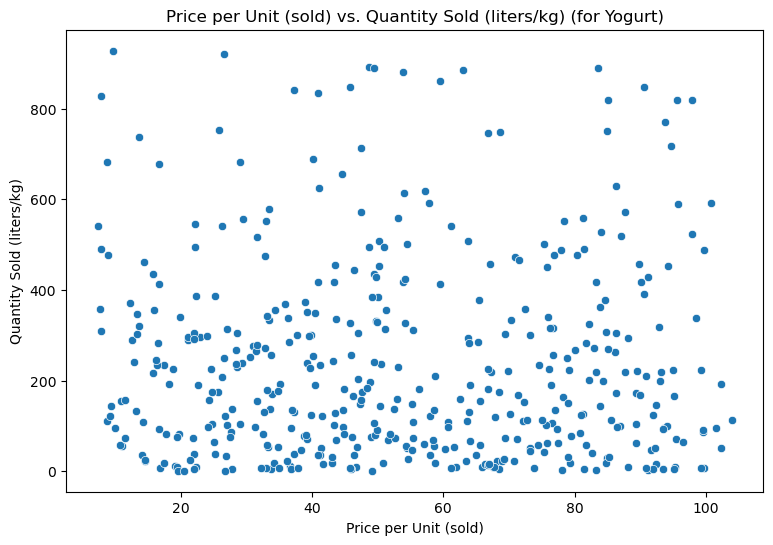

In [14]:
## Price per unit vs. Quantity Sold

plt.figure(figsize = (9,6))

sns.scatterplot(x = dairy[dairy['Product Name'] == 'Yogurt']['Price per Unit (sold)'],
                y = dairy['Quantity Sold (liters/kg)'])

plt.title("Price per Unit (sold) vs. Quantity Sold (liters/kg) (for Yogurt)")

Text(0.5, 1.0, 'Price per unit (sold) versus Shelf Life (days)')

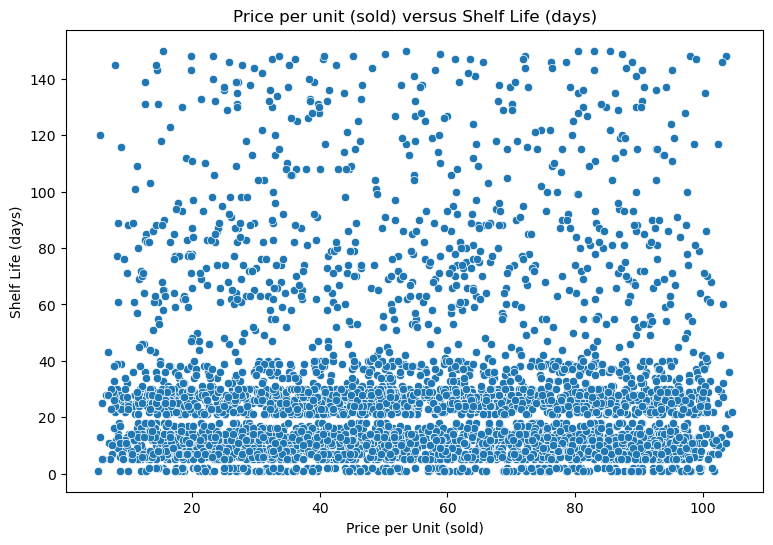

In [15]:
## Shelf Life vs. Price Per Unit

plt.figure(figsize = (9,6))

sns.scatterplot(x = dairy['Price per Unit (sold)'],
                y = dairy['Shelf Life (days)'])

plt.title("Price per unit (sold) versus Shelf Life (days)")


In [16]:
dairy['Storage Condition'].unique()

array(['Frozen', 'Tetra Pack', 'Refrigerated', 'Polythene Packet',
       'Ambient'], dtype=object)

Text(0.5, 1.0, 'Price per unit (sold) versus Shelf Life (days)')

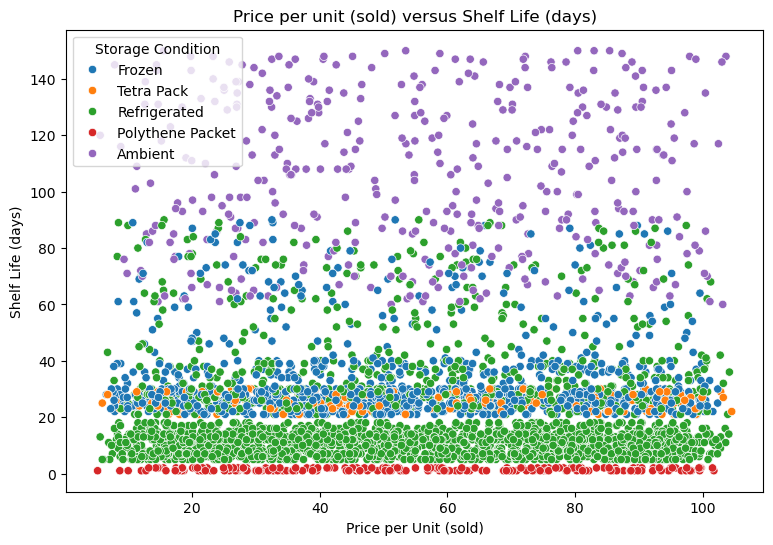

In [17]:
plt.figure(figsize = (9,6))

sns.scatterplot(x = dairy['Price per Unit (sold)'],
                y = dairy['Shelf Life (days)'],
                hue = dairy['Storage Condition'])

plt.title("Price per unit (sold) versus Shelf Life (days)")

Text(0.5, 1.0, 'Production Date vs. Quantity Sold (for Amul)')

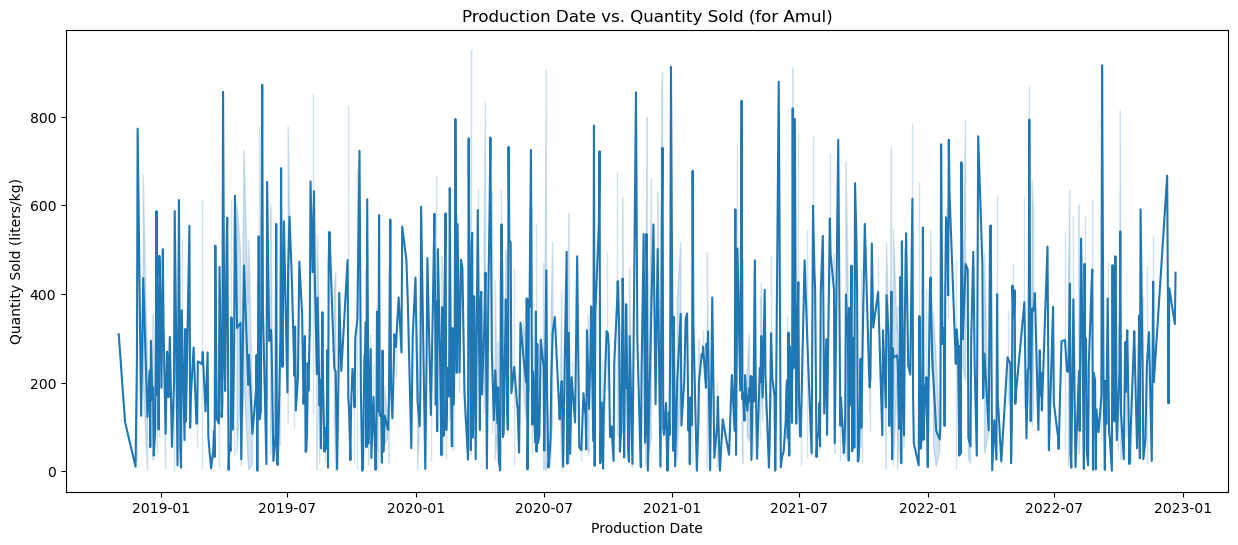

In [18]:
## Production Date vs. Quantity Sold

dairy['Production Date'] = pd.to_datetime(dairy['Production Date'])


plt.figure(figsize= (15,6))

firstdate = datetime(2019, 1, 1)
sns.lineplot(x = dairy[dairy['Brand'] == 'Amul']['Production Date'],
            y = dairy['Quantity Sold (liters/kg)'])

plt.title("Production Date vs. Quantity Sold (for Amul)")

C:\Users\tatep\AppData\Local\Temp\ipykernel_1392\1950469991.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(x = dairy[dairy['Product Name'] == 'Milk'][dairy['Brand'] == 'Amul']['Expiration Date'],


Text(0.5, 1.0, 'Expiration Date vs. Price Per Unit (Milk from Amul)')

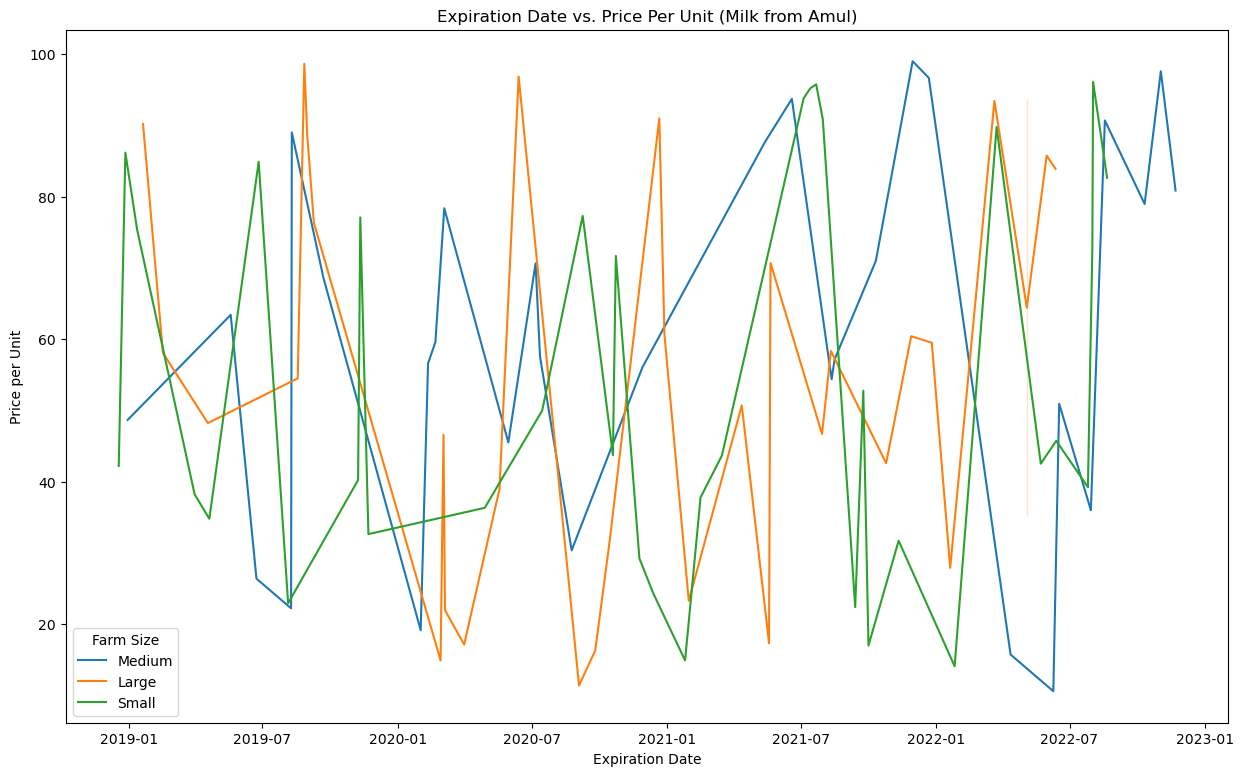

In [19]:
## Expiration Date vs. Price Per Unit (One Product)

plt.figure(figsize = (15, 9))

dairy['Expiration Date'] = pd.to_datetime(dairy['Expiration Date'])


sns.lineplot(x = dairy[dairy['Product Name'] == 'Milk'][dairy['Brand'] == 'Amul']['Expiration Date'],
                y = dairy['Price per Unit'],
                hue = dairy['Farm Size'])

plt.title("Expiration Date vs. Price Per Unit (Milk from Amul)")

In [20]:
dairy.head()

Location  Total Land Area (acres)  Number of Cows Farm Size  \
0      Telangana                   310.84              96    Medium   
1  Uttar Pradesh                    19.19              44     Large   
2     Tamil Nadu                   581.69              24    Medium   
3      Telangana                   908.00              89     Small   
4    Maharashtra                   861.95              21    Medium   

         Date  Product ID Product Name                 Brand  \
0  2022-02-17           5    Ice Cream           Dodla Dairy   
1  2021-12-01           1         Milk                  Amul   
2  2022-02-28           4       Yogurt           Dodla Dairy   
3  2019-06-09           3       Cheese  Britannia Industries   
4  2020-12-14           8   Buttermilk          Mother Dairy   

   Quantity (liters/kg)  Price per Unit  ...  Production Date  \
0                222.40           85.72  ...       2021-12-27   
1                687.48           42.61  ...       2021-10-03   
2                503.48           36.50  ...       2022-01-14   
3                823.36           26.52  ...       2019-05-15   
4                147.77           83.85  ...       2020-10-17   

   Expiration Date Quantity Sold (liters/kg) Price per Unit (sold)  \
0       2022-01-21                         7                 82.24   
1       2021-10-25                       558                 39.24   
2       2022-02-13                       256                 33.81   
3       2019-07-26                       601                 28.92   
4       2020-10-28                       145                 83.07   

  Approx. Total Revenue(INR)  Customer Location  Sales Channel  \
0                     575.68     Madhya Pradesh      Wholesale   
1                   21895.92             Kerala      Wholesale   
2                    8655.36     Madhya Pradesh         Online   
3                   17380.92          Rajasthan         Online   
4                   12045.15          Jharkhand         Retail   

   Quantity in Stock (liters/kg) Minimum Stock Threshold (liters/kg)  \
0                            215                               19.55   
1                            129                               43.17   
2                            247                               15.10   
3                            222                               74.50   
4                              2                               76.02   

  Reorder Quantity (liters/kg)  
0                        64.03  
1                       181.10  
2                       140.83  
3                        57.68  
4                        33.40  

[5 rows x 23 columns]

C:\Users\tatep\AppData\Local\Temp\ipykernel_1392\2559798260.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(x = dairy[dairy['Product Name'] == 'Cheese'][dairy['Brand'] == 'Amul']['Date'],


Text(0.5, 1.0, 'Date of Sale vs. Approx. Total Revenue (INR) (For Cheese from Amul)')

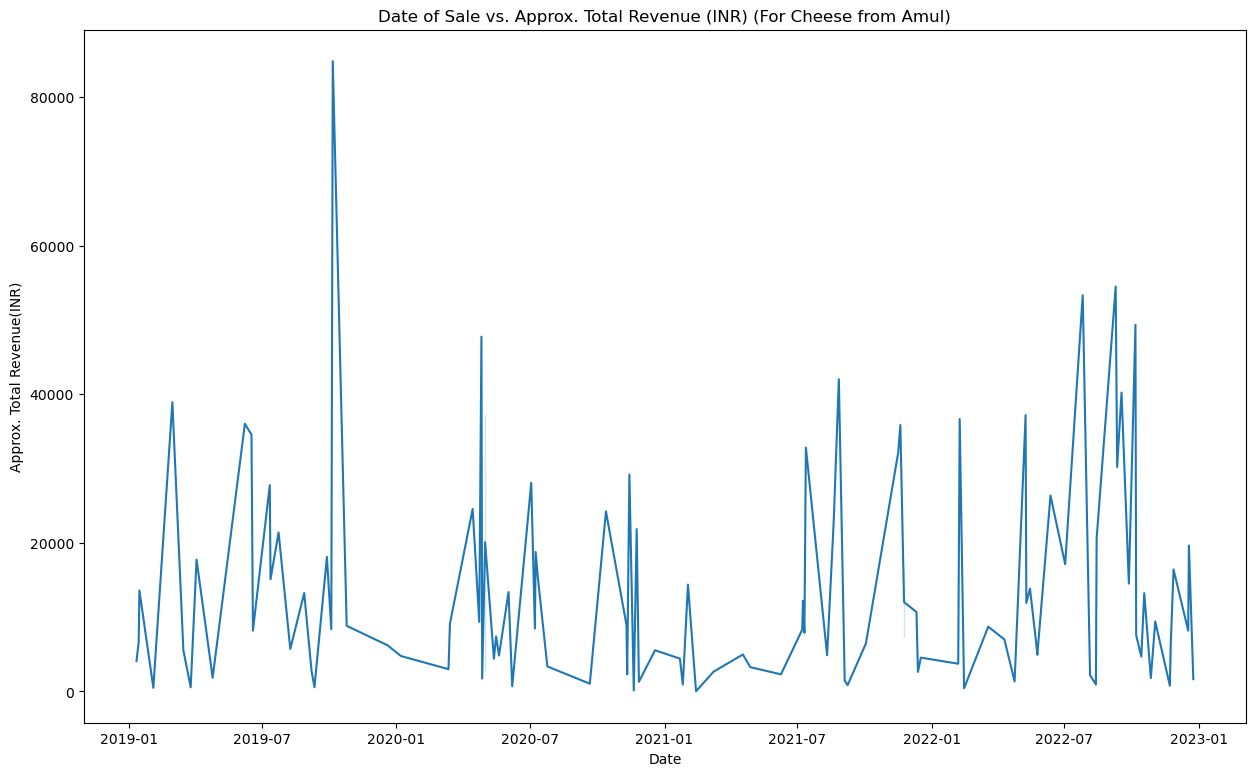

In [21]:
## Approximate Total Revenue vs. Date

plt.figure(figsize = (15, 9))

dairy['Date'] = pd.to_datetime(dairy['Date'])


sns.lineplot(x = dairy[dairy['Product Name'] == 'Cheese'][dairy['Brand'] == 'Amul']['Date'],
                y = dairy['Approx. Total Revenue(INR)'])

plt.title("Date of Sale vs. Approx. Total Revenue (INR) (For Cheese from Amul)")

In [22]:
## Normalizing total revenue

dairy['Normalized Approx. Total Rev'] = (dairy['Approx. Total Revenue(INR)'] - dairy['Approx. Total Revenue(INR)'].mean())/dairy['Approx. Total Revenue(INR)'].std()
dairy.head()

Location  Total Land Area (acres)  Number of Cows Farm Size  \
0      Telangana                   310.84              96    Medium   
1  Uttar Pradesh                    19.19              44     Large   
2     Tamil Nadu                   581.69              24    Medium   
3      Telangana                   908.00              89     Small   
4    Maharashtra                   861.95              21    Medium   

        Date  Product ID Product Name                 Brand  \
0 2022-02-17           5    Ice Cream           Dodla Dairy   
1 2021-12-01           1         Milk                  Amul   
2 2022-02-28           4       Yogurt           Dodla Dairy   
3 2019-06-09           3       Cheese  Britannia Industries   
4 2020-12-14           8   Buttermilk          Mother Dairy   

   Quantity (liters/kg)  Price per Unit  ...  Expiration Date  \
0                222.40           85.72  ...       2022-01-21   
1                687.48           42.61  ...       2021-10-25   
2                503.48           36.50  ...       2022-02-13   
3                823.36           26.52  ...       2019-07-26   
4                147.77           83.85  ...       2020-10-28   

   Quantity Sold (liters/kg) Price per Unit (sold) Approx. Total Revenue(INR)  \
0                          7                 82.24                     575.68   
1                        558                 39.24                   21895.92   
2                        256                 33.81                    8655.36   
3                        601                 28.92                   17380.92   
4                        145                 83.07                   12045.15   

  Customer Location  Sales Channel  Quantity in Stock (liters/kg)  \
0    Madhya Pradesh      Wholesale                            215   
1            Kerala      Wholesale                            129   
2    Madhya Pradesh         Online                            247   
3         Rajasthan         Online                            222   
4         Jharkhand         Retail                              2   

   Minimum Stock Threshold (liters/kg) Reorder Quantity (liters/kg)  \
0                                19.55                        64.03   
1                                43.17                       181.10   
2                                15.10                       140.83   
3                                74.50                        57.68   
4                                76.02                        33.40   

  Normalized Approx. Total Rev  
0                    -0.889689  
1                     0.568903  
2                    -0.336930  
3                     0.260016  
4                    -0.105023  

[5 rows x 24 columns]

Text(0.5, 1.0, 'Production to Expiration vs. Normalized Approx. Total Revenue (for Amul)')

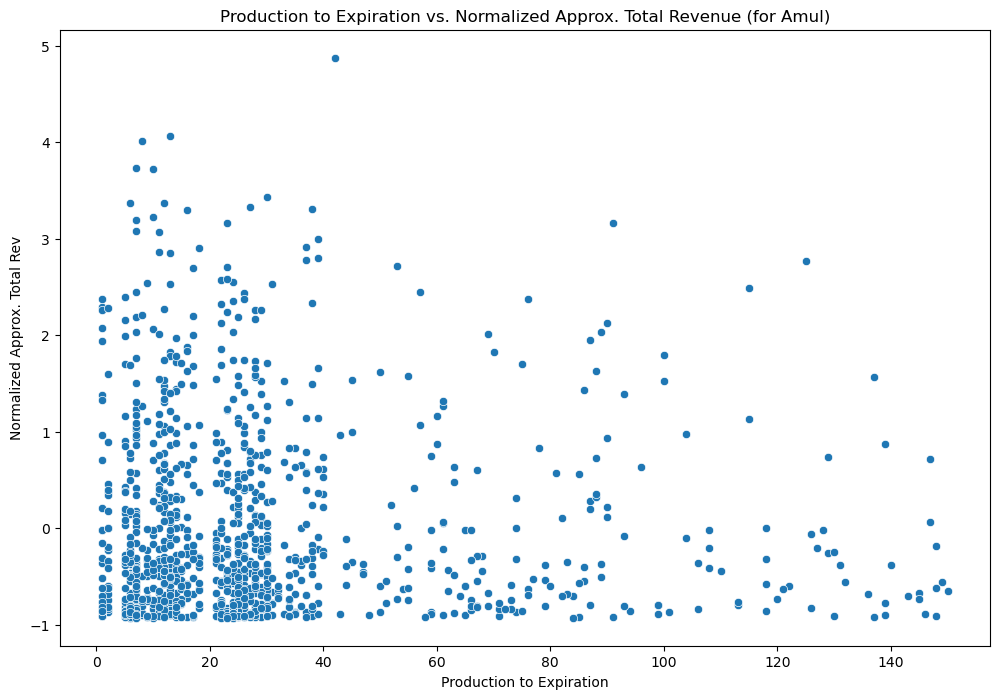

In [23]:
## Total Revenue vs. Difference Between Expiration Date and Production Date

plt.figure(figsize = (12,8))

dairy[['Expiration Date', 'Production Date']] = dairy[['Expiration Date', 'Production Date']].apply(pd.to_datetime)
dairy['Production to Expiration'] = (dairy['Expiration Date'] - dairy['Production Date']).dt.days
dairy.head()

sns.scatterplot(x = dairy[dairy['Brand'] == 'Amul']['Production to Expiration'],
                y = dairy['Normalized Approx. Total Rev'])

plt.title("Production to Expiration vs. Normalized Approx. Total Revenue (for Amul)")


# Summary Statistics

In [24]:
dairy.groupby(['Brand'])['Quantity Sold (liters/kg)'].describe()

count        mean         std  min     25%    50%  \
Brand                                                                      
Amul                  1053.0  251.139601  215.856690  1.0   73.00  192.0   
Britannia Industries    88.0  239.170455  208.036647  6.0   51.00  192.0   
Dodla Dairy            222.0  223.725225  207.668486  1.0   64.00  144.0   
Dynamix Dairies        106.0  252.566038  226.129715  1.0   68.50  151.5   
Mother Dairy          1010.0  249.252475  217.051146  1.0   66.00  193.0   
Palle2patnam           211.0  242.270142  223.970083  1.0   64.50  165.0   
Parag Milk Foods       102.0  262.372549  202.994314  1.0   94.25  221.0   
Passion Cheese          96.0  284.333333  234.473640  1.0   91.75  240.0   
Raj                    685.0  255.097810  225.243061  1.0   71.00  197.0   
Sudha                  648.0  229.810185  205.799747  1.0   64.00  172.5   
Warana                 104.0  293.211538  234.181892  3.0  101.25  236.0   

                         75%    max  
Brand                                
Amul                  384.00  949.0  
Britannia Industries  358.50  757.0  
Dodla Dairy           339.50  890.0  
Dynamix Dairies       409.75  859.0  
Mother Dairy          371.50  956.0  
Palle2patnam          347.00  920.0  
Parag Milk Foods      397.75  759.0  
Passion Cheese        426.75  934.0  
Raj                   391.00  960.0  
Sudha                 340.25  949.0  
Warana                437.00  912.0

In [25]:
dairy.groupby(['Brand'])['Reorder Quantity (liters/kg)'].describe()

count        mean        std    min      25%      50%  \
Brand                                                                          
Amul                  1053.0  108.246002  51.784524  20.02  63.1600  107.380   
Britannia Industries    88.0  104.431477  54.352223  20.04  59.6650   98.030   
Dodla Dairy            222.0  108.783378  49.924769  23.26  67.6650  108.130   
Dynamix Dairies        106.0  107.431038  52.176335  20.34  58.2525  106.645   
Mother Dairy          1010.0  108.022119  50.842552  20.09  64.1375  107.895   
Palle2patnam           211.0  110.941232  48.695219  21.95  72.8650  106.570   
Parag Milk Foods       102.0  112.771667  50.554776  21.44  67.0500  117.380   
Passion Cheese          96.0  104.140833  47.775905  23.88  67.4600   95.460   
Raj                    685.0  111.937635  52.055945  20.21  64.3300  113.460   
Sudha                  648.0  110.217052  53.078059  20.18  64.0000  108.280   
Warana                 104.0  106.457788  52.219615  22.57  54.8175  104.455   

                           75%     max  
Brand                                   
Amul                  153.7900  199.95  
Britannia Industries  155.0200  197.40  
Dodla Dairy           148.8575  196.40  
Dynamix Dairies       150.1925  197.56  
Mother Dairy          149.8775  199.68  
Palle2patnam          152.9400  197.15  
Parag Milk Foods      154.4525  197.51  
Passion Cheese        140.7525  196.69  
Raj                   158.2400  199.81  
Sudha                 155.9975  199.77  
Warana                153.3800  196.11

In [26]:
dairy.groupby(['Farm Size'])['Minimum Stock Threshold (liters/kg)'].describe()

count       mean        std    min      25%    50%      75%    max
Farm Size                                                                     
Large      1462.0  55.668605  26.167956  10.02  33.2950  56.32  78.6100  99.93
Medium     1439.0  56.124281  26.352448  10.21  33.2800  56.66  79.4200  99.92
Small      1424.0  55.686608  26.402301  10.03  32.2175  56.40  79.1625  99.99

In [27]:
dairy.groupby(['Sales Channel'])['Quantity Sold (liters/kg)'].describe()

count        mean         std  min   25%    50%     75%    max
Sales Channel                                                                 
Online         1371.0  239.994894  210.063767  1.0  70.0  185.0  356.00  949.0
Retail         1478.0  253.590663  221.818195  1.0  67.0  192.5  387.00  945.0
Wholesale      1476.0  250.115854  218.454679  1.0  71.0  190.5  376.25  960.0

In [28]:
dairy.groupby(['Brand'])['Approx. Total Revenue(INR)'].describe()

count          mean           std     min        25%  \
Brand                                                                         
Amul                  1053.0  13873.565489  14688.162512   16.30  2923.2000   
Britannia Industries    88.0  11699.114205  12352.926512  222.09  2554.8725   
Dodla Dairy            222.0  11733.591757  13476.468411   26.77  2531.0850   
Dynamix Dairies        106.0  13961.177170  15479.728595   12.54  3257.3800   
Mother Dairy          1010.0  13630.481653  14549.264974   14.99  2886.0550   
Palle2patnam           211.0  11985.730427  14408.714338   19.66  2788.7900   
Parag Milk Foods       102.0  14869.585392  14034.184572   23.89  3901.5300   
Passion Cheese          96.0  15610.970312  15100.366592   34.22  3962.8000   
Raj                    685.0  13957.339620  15192.797462   21.12  3242.6800   
Sudha                  648.0  12916.835741  14193.208583   17.46  2704.3650   
Warana                 104.0  17014.476442  16331.988186  256.86  4604.9775   

                            50%         75%       max  
Brand                                                  
Amul                   8187.660  20561.3100  84838.46  
Britannia Industries   6904.600  18293.8850  55540.50  
Dodla Dairy            7109.240  15045.8625  60313.95  
Dynamix Dairies        8632.020  18022.8125  66323.46  
Mother Dairy           8879.460  19969.6650  85352.94  
Palle2patnam           6655.000  16610.3650  78214.50  
Parag Milk Foods      11131.690  21189.8975  62856.66  
Passion Cheese        12095.525  24101.3025  73718.57  
Raj                    8376.000  19950.4000  89108.90  
Sudha                  7495.485  18359.3550  81350.52  
Warana                11922.365  25148.9000  76247.22

Text(0.5, 1.0, 'Date of Sale vs. Quantity Sold (liters/kg)')

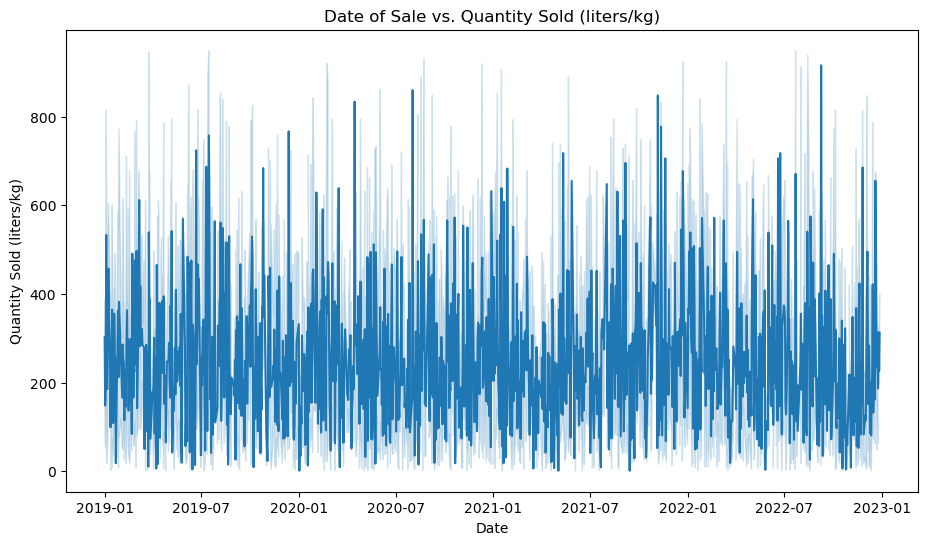

In [49]:
plt.figure(figsize= (11,6))

sns.lineplot(x = dairy['Date'],
                y = dairy['Quantity Sold (liters/kg)'])

plt.title("Date of Sale vs. Quantity Sold (liters/kg)")

Text(0.5, 1.0, 'Date of Sale vs. Quantity Sold (liters/kg)')

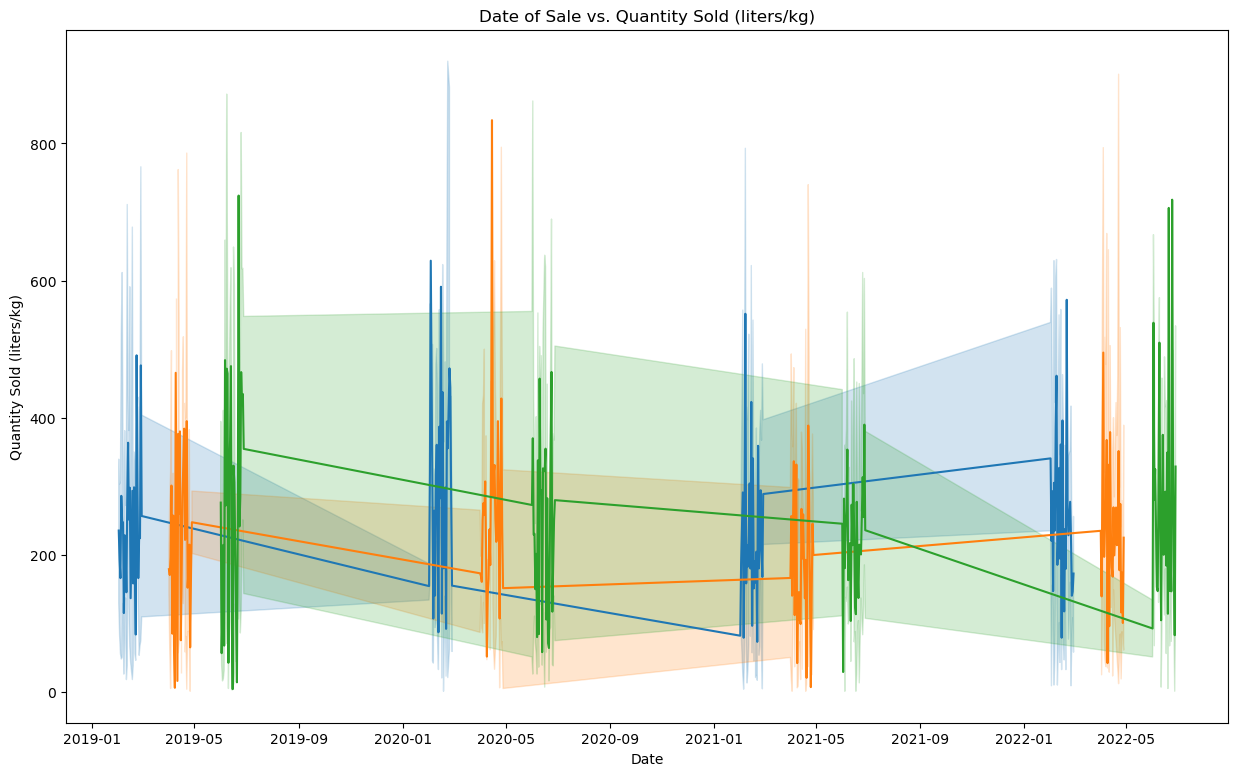

In [67]:
plt.figure(figsize= (15,9))

sns.lineplot(x = dairy[dairy['Date'].dt.month == 2]['Date'],
                y = dairy['Quantity Sold (liters/kg)'])
sns.lineplot(x = dairy[dairy['Date'].dt.month == 4]['Date'],
                y = dairy['Quantity Sold (liters/kg)'])
sns.lineplot(x = dairy[dairy['Date'].dt.month == 6]['Date'],
                y = dairy['Quantity Sold (liters/kg)'])

plt.title("Date of Sale vs. Quantity Sold (liters/kg)")

Text(0.5, 1.0, 'Date of Sale vs. Quantity Sold (liters/kg) in 2019')

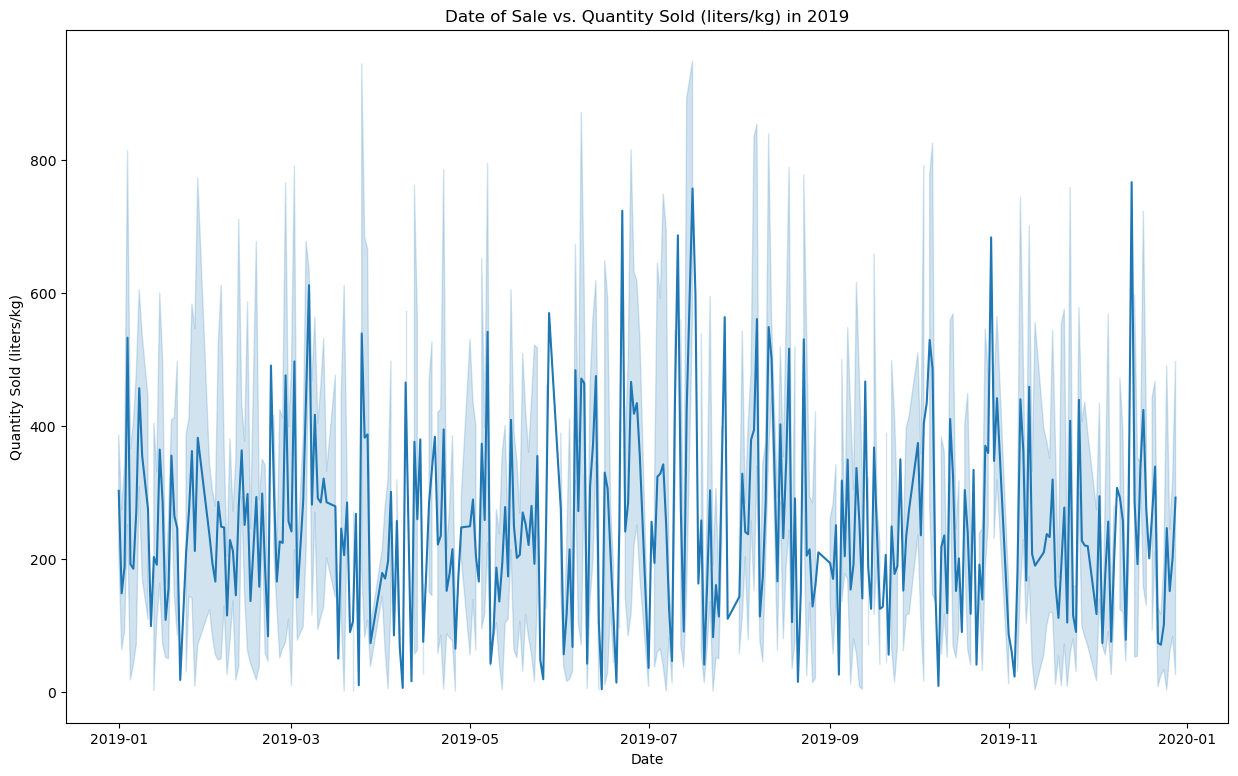

In [89]:
plt.figure(figsize= (15,9))

sns.lineplot(x = dairy[dairy['Date'].dt.year == 2019]['Date'],
                y = dairy['Quantity Sold (liters/kg)'])

plt.title("Date of Sale vs. Quantity Sold (liters/kg) in 2019")

In [95]:
dairy['Season'] = 'Winter'

dairy.loc[(dairy.Date.dt.month <= 6) & (dairy.Date.dt.month > 3),'Season'] = 'Spring'
dairy.loc[(dairy.Date.dt.month <= 9) & (dairy.Date.dt.month > 6),'Season'] = 'Summer'
dairy.loc[(dairy.Date.dt.month <= 12) & (dairy.Date.dt.month > 9),'Season'] = 'Fall'


In [96]:
dairy.sample(5)

Location  Total Land Area (acres)  Number of Cows Farm Size  \
2055  Madhya Pradesh                   685.61              34    Medium   
2006       Karnataka                   409.06              38    Medium   
1944          Kerala                   252.95              93    Medium   
3325       Telangana                   714.49              20     Small   
1015       Telangana                    88.41              58     Small   

           Date  Product ID Product Name         Brand  Quantity (liters/kg)  \
2055 2021-03-01           6         Curd         Sudha                538.58   
2006 2019-07-16           9       Paneer           Raj                958.81   
1944 2020-07-03           4       Yogurt  Palle2patnam                212.16   
3325 2019-06-28           4       Yogurt   Dodla Dairy                258.37   
1015 2020-07-13           5    Ice Cream  Palle2patnam                899.69   

      Price per Unit  ...  Price per Unit (sold)  Approx. Total Revenue(INR)  \
2055           32.78  ...                  32.56                    12470.48   
2006           35.47  ...                  36.92                    35037.08   
1944           13.18  ...                  14.30                     1544.40   
3325           85.72  ...                  85.15                     2639.65   
1015           12.00  ...                   8.30                     2855.20   

     Customer Location Sales Channel Quantity in Stock (liters/kg)  \
2055         Jharkhand     Wholesale                           155   
2006    Madhya Pradesh        Online                             9   
1944        Tamil Nadu     Wholesale                           104   
3325       Maharashtra        Retail                           227   
1015        Tamil Nadu        Retail                           555   

      Minimum Stock Threshold (liters/kg)  Reorder Quantity (liters/kg)  \
2055                                36.03                        197.54   
2006                                57.78                        195.98   
1944                                94.32                        146.26   
3325                                77.98                        182.29   
1015                                27.01                        138.09   

      Normalized Approx. Total Rev Production to Expiration  Season  
2055                     -0.075924                        5  Winter  
2006                      1.467935                        9  Summer  
1944                     -0.823415                       27  Summer  
3325                     -0.748485                       22  Spring  
1015                     -0.733739                       30  Summer  

[5 rows x 26 columns]

Text(0.5, 1.0, 'Date of Sale vs. Quantity Sold (liters/kg) in 2019')

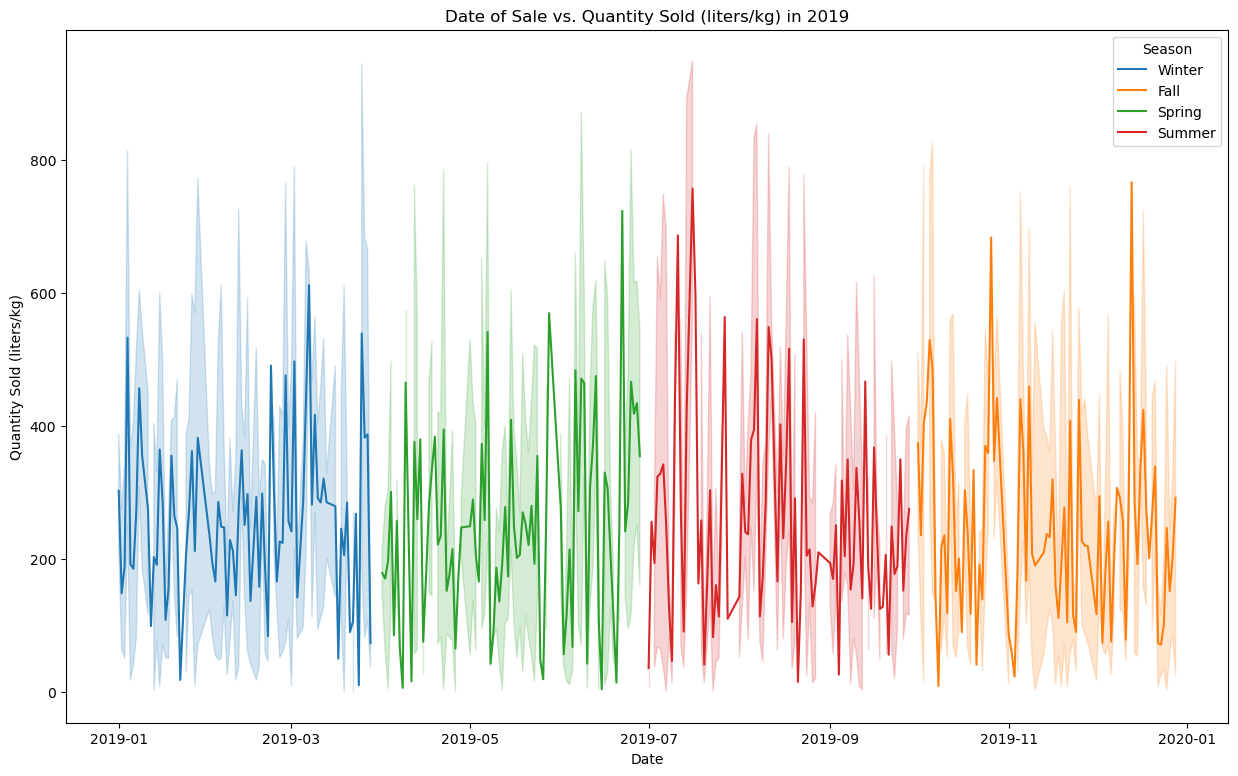

In [98]:
plt.figure(figsize= (15,9))

sns.lineplot(x = dairy[dairy['Date'].dt.year == 2019]['Date'],
                y = dairy['Quantity Sold (liters/kg)'],
                hue = dairy.Season)

plt.title("Date of Sale vs. Quantity Sold (liters/kg) in 2019")

Text(0.5, 1.0, 'Date of Sale vs. Price per Unit (Sold)')

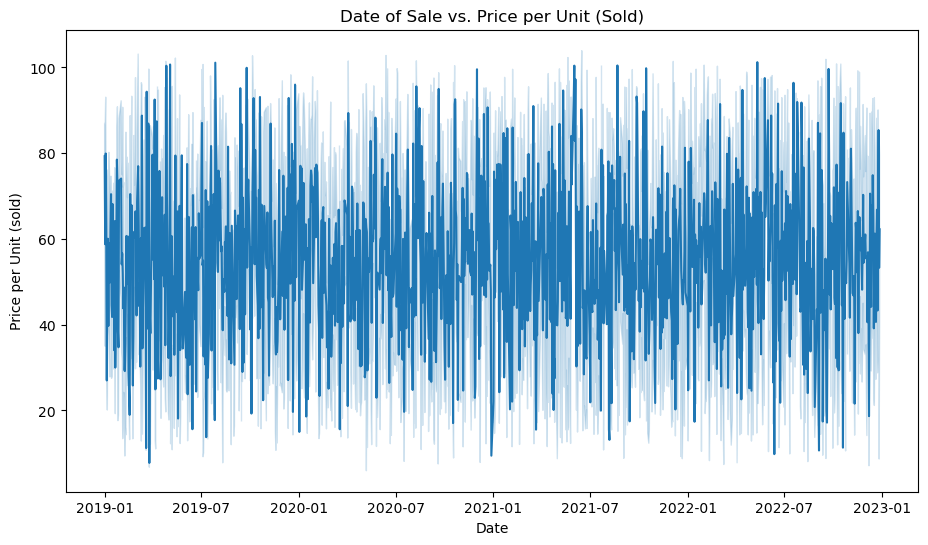

In [45]:
plt.figure(figsize = (11,6))

sns.lineplot(x = dairy['Date'],
             y = dairy['Price per Unit (sold)'])

plt.title("Date of Sale vs. Price per Unit (Sold)")

Text(0.5, 1.0, 'Date of Sale vs. Price per Unit (Sold)')

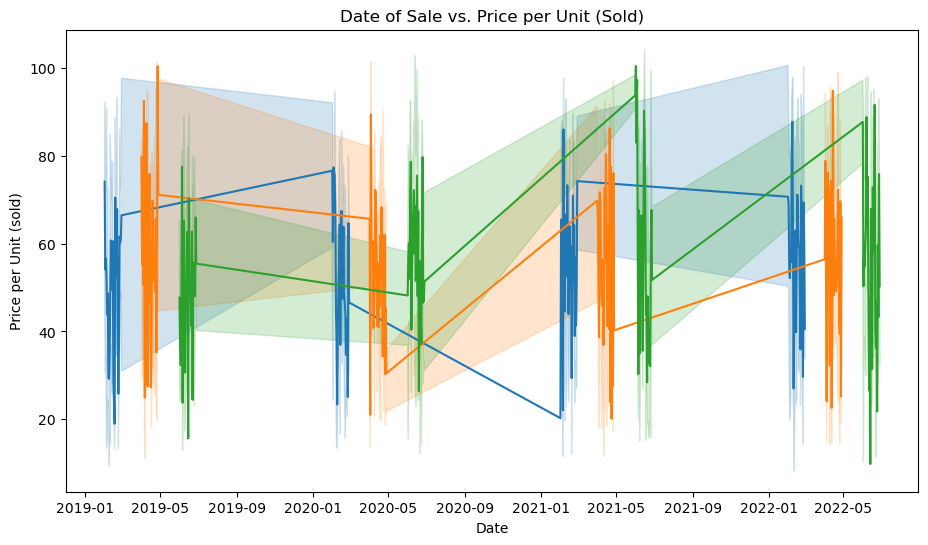

In [68]:
plt.figure(figsize = (11,6))

sns.lineplot(x = dairy[dairy['Date'].dt.month == 2]['Date'],
             y = dairy['Price per Unit (sold)'])
sns.lineplot(x = dairy[dairy['Date'].dt.month == 4]['Date'],
             y = dairy['Price per Unit (sold)'])
sns.lineplot(x = dairy[dairy['Date'].dt.month == 6]['Date'],
             y = dairy['Price per Unit (sold)'])

plt.title("Date of Sale vs. Price per Unit (Sold)")

Text(0.5, 1.0, 'Date of Sale vs. Price per Unit (Sold) in 2019')

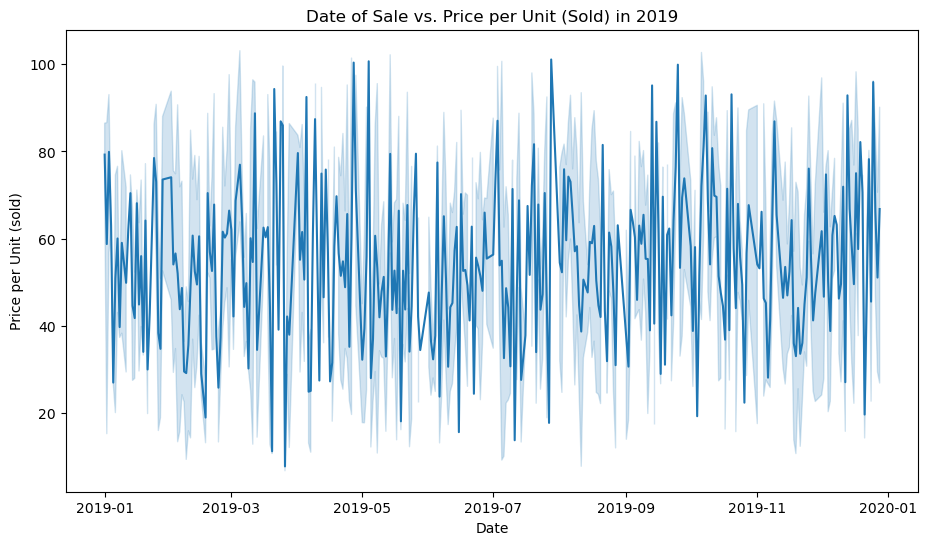

In [77]:
plt.figure(figsize = (11,6))

sns.lineplot(x = dairy[dairy['Date'].dt.year == 2019]['Date'],
             y = dairy['Price per Unit (sold)'])

plt.title("Date of Sale vs. Price per Unit (Sold) in 2019")

Text(0.5, 1.0, 'Date of Sale vs. Price per Unit (sold) in 2019')

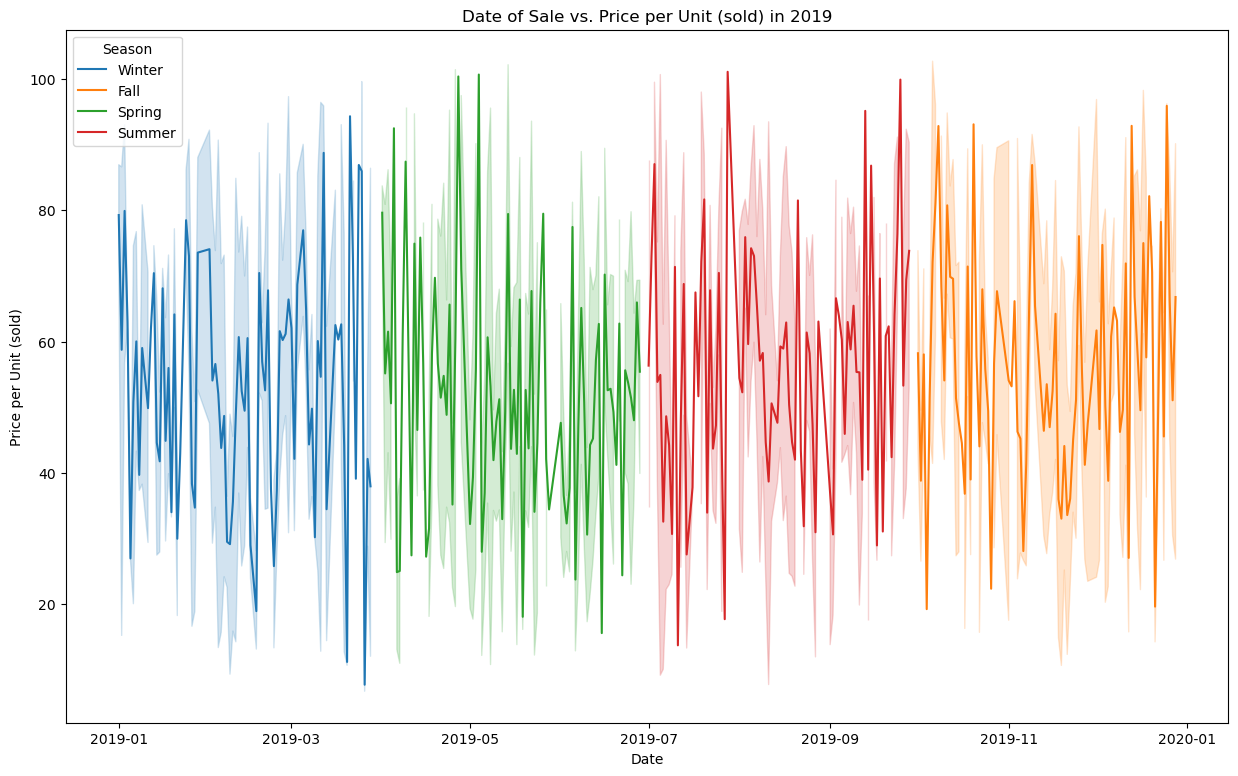

In [ ]:
plt.figure(figsize= (15,9))

sns.lineplot(x = dairy[dairy['Date'].dt.year == 2019]['Date'],
                y = dairy['Price per Unit (sold)'],
                hue = dairy.Season)

plt.title("Date of Sale vs. Price per Unit (sold) in 2019")

In [46]:
dairy['Price per Unit (sold)'].describe()

count    4325.00000
mean       54.77914
std        26.19279
min         5.21000
25%        32.64000
50%        54.14000
75%        77.46000
max       104.51000
Name: Price per Unit (sold), dtype: float64

In [70]:
dairy.groupby(dairy['Date'].dt.month)['Price per Unit (sold)'].describe()

count       mean        std   min      25%     50%      75%     max
Date                                                                     
1     381.0  57.372362  25.109589  6.95  37.3400  56.880  80.6300  101.06
2     375.0  55.345360  26.686124  6.87  31.6300  56.150  78.2200  103.49
3     356.0  53.134522  25.143854  6.77  32.8575  52.045  72.6275  103.11
4     340.0  54.633971  26.355988  5.61  31.6325  53.360  76.8925  104.51
5     348.0  54.582730  27.676850  5.94  29.9500  54.340  79.6375  102.79
6     393.0  54.183461  26.229267  7.37  33.1400  51.250  75.3100  104.06
7     352.0  53.996080  25.821334  5.61  34.5425  51.145  76.2900  103.19
8     324.0  54.313827  26.229989  5.21  31.1125  55.345  78.1675  101.53
9     392.0  55.759082  26.704159  6.78  34.2825  55.545  78.4975  101.88
10    339.0  53.797876  26.292670  6.58  33.1150  52.730  74.1450  104.15
11    368.0  53.621603  25.588983  8.54  29.7300  53.820  74.7300  102.42
12    357.0  56.285658  26.502295  7.11  32.9700  58.810  78.6900  103.57

In [73]:
dairy['Quantity Sold (liters/kg)'].describe()

count    4325.000000
mean      248.095029
std       217.024182
min         1.000000
25%        69.000000
50%       189.000000
75%       374.000000
max       960.000000
Name: Quantity Sold (liters/kg), dtype: float64

In [72]:
dairy.groupby(dairy['Date'].dt.month)['Quantity Sold (liters/kg)'].describe()

count        mean         std  min    25%    50%     75%    max
Date                                                                 
1     381.0  262.485564  233.304247  1.0  69.00  191.0  404.00  928.0
2     375.0  247.733333  210.211501  1.0  70.00  216.0  365.50  956.0
3     356.0  245.856742  206.639836  1.0  82.00  188.0  376.25  945.0
4     340.0  224.650000  202.469498  1.0  60.75  169.0  320.25  949.0
5     348.0  248.353448  218.088060  1.0  69.75  182.5  382.50  921.0
6     393.0  256.587786  216.463017  1.0  74.00  205.0  384.00  879.0
7     352.0  232.406250  216.201584  1.0  66.75  157.5  343.00  949.0
8     324.0  274.373457  234.732770  1.0  76.75  214.0  427.50  960.0
9     392.0  243.561224  220.738939  1.0  58.00  178.0  383.75  916.0
10    339.0  254.262537  215.528274  1.0  72.00  202.0  372.50  826.0
11    368.0  234.600543  218.398345  1.0  60.75  174.0  331.00  934.0
12    357.0  252.728291  207.695168  1.0  76.00  212.0  369.00  924.0

In [78]:
dairy.loc[dairy.Date.dt.month <= 3]['Quantity Sold (liters/kg)'].describe()

count    1112.000000
mean      252.187050
std       217.238604
min         1.000000
25%        71.000000
50%       192.500000
75%       384.250000
max       956.000000
Name: Quantity Sold (liters/kg), dtype: float64

In [87]:
dairy.loc[(dairy.Date.dt.month <= 6) & (dairy.Date.dt.month > 3)]['Quantity Sold (liters/kg)'].describe()

count    1081.000000
mean      243.891767
std       212.926888
min         1.000000
25%        70.000000
50%       185.000000
75%       366.000000
max       949.000000
Name: Quantity Sold (liters/kg), dtype: float64

In [85]:
dairy.loc[(dairy.Date.dt.month <= 9) & (dairy.Date.dt.month > 6)]['Quantity Sold (liters/kg)'].describe()

count    1068.00000
mean      249.23221
std       224.07315
min         1.00000
25%        66.00000
50%       180.00000
75%       383.75000
max       960.00000
Name: Quantity Sold (liters/kg), dtype: float64

In [86]:
dairy.loc[(dairy.Date.dt.month <= 12) & (dairy.Date.dt.month > 9)]['Quantity Sold (liters/kg)'].describe()

count    1064.000000
mean      246.947368
std       213.929488
min         1.000000
25%        69.750000
50%       193.500000
75%       367.000000
max       934.000000
Name: Quantity Sold (liters/kg), dtype: float64

In [101]:
dairy.loc[dairy.Date.dt.month <= 3]['Price per Unit (sold)'].describe()

count    1112.000000
mean       55.332077
std        25.697674
min         6.770000
25%        33.370000
50%        54.375000
75%        77.742500
max       103.490000
Name: Price per Unit (sold), dtype: float64

In [103]:
dairy.loc[(dairy.Date.dt.month <= 6) & (dairy.Date.dt.month > 3)]['Price per Unit (sold)'].describe()

count    1081.000000
mean       54.453691
std        26.719022
min         5.610000
25%        31.880000
50%        53.130000
75%        78.380000
max       104.510000
Name: Price per Unit (sold), dtype: float64

In [104]:
dairy.loc[(dairy.Date.dt.month <= 9) & (dairy.Date.dt.month > 6)]['Price per Unit (sold)'].describe()

count    1068.000000
mean       54.739569
std        26.259140
min         5.210000
25%        32.905000
50%        54.165000
75%        77.640000
max       103.190000
Name: Price per Unit (sold), dtype: float64

In [105]:
dairy.loc[(dairy.Date.dt.month <= 12) & (dairy.Date.dt.month > 9)]['Price per Unit (sold)'].describe()

count    1064.000000
mean       54.571626
std        26.126534
min         6.580000
25%        32.272500
50%        54.500000
75%        76.620000
max       104.150000
Name: Price per Unit (sold), dtype: float64

In [107]:
dairy.groupby(dairy['Customer Location'])['Quantity Sold (liters/kg)'].describe()

count        mean         std  min    25%    50%     75%  \
Customer Location                                                             
Bihar              284.0  273.042254  229.773121  1.0  74.50  216.5  427.50   
Chandigarh         489.0  234.709611  203.020283  1.0  65.00  181.0  346.00   
Delhi              499.0  237.683367  211.821977  1.0  70.00  178.0  351.50   
Gujarat            248.0  257.814516  231.830154  2.0  67.75  182.5  391.00   
Haryana            229.0  235.576419  218.353386  1.0  48.00  166.0  355.00   
Jharkhand          243.0  250.823045  217.333991  1.0  80.50  197.0  354.50   
Karnataka          264.0  255.189394  217.376218  1.0  74.75  195.5  373.25   
Kerala             267.0  250.741573  218.519568  1.0  72.00  206.0  366.00   
Madhya Pradesh     248.0  242.266129  203.527181  1.0  63.75  201.5  373.00   
Maharashtra        271.0  242.981550  222.338022  1.0  65.00  178.0  363.00   
Rajasthan          234.0  243.662393  225.284106  1.0  52.50  171.5  387.75   
Tamil Nadu         267.0  246.786517  209.738459  1.0  70.50  198.0  373.00   
Telangana          251.0  269.920319  231.567065  1.0  85.00  203.0  407.00   
Uttar Pradesh      267.0  256.176030  213.922187  2.0  72.50  201.0  388.50   
West Bengal        264.0  242.231061  216.323734  1.0  73.25  169.0  356.25   

                     max  
Customer Location         
Bihar              913.0  
Chandigarh         928.0  
Delhi              940.0  
Gujarat            949.0  
Haryana            915.0  
Jharkhand          901.0  
Karnataka          894.0  
Kerala             925.0  
Madhya Pradesh     949.0  
Maharashtra        949.0  
Rajasthan          926.0  
Tamil Nadu         956.0  
Telangana          960.0  
Uttar Pradesh      871.0  
West Bengal        934.0

In [108]:
dairy.groupby(dairy['Location'])['Quantity Sold (liters/kg)'].describe()

count        mean         std  min    25%    50%     75%  \
Location                                                                   
Bihar           245.0  254.673469  224.414282  1.0  56.00  219.0  371.00   
Chandigarh      519.0  259.393064  224.062008  1.0  75.00  204.0  393.00   
Delhi           525.0  247.801905  214.906972  1.0  72.00  193.0  381.00   
Gujarat         267.0  239.913858  200.337075  1.0  79.50  173.0  369.00   
Haryana         253.0  236.474308  217.945631  1.0  68.00  166.0  372.00   
Jharkhand       248.0  233.536290  211.722774  1.0  61.00  158.0  352.25   
Karnataka       261.0  237.689655  217.579922  1.0  60.00  165.0  363.00   
Kerala          249.0  241.891566  221.740840  1.0  73.00  171.0  366.00   
Madhya Pradesh  259.0  249.154440  203.704089  1.0  87.00  200.0  371.50   
Maharashtra     255.0  259.156863  223.852680  1.0  73.00  198.0  370.00   
Rajasthan       256.0  262.117188  225.241539  1.0  68.75  200.5  392.00   
Tamil Nadu      223.0  273.744395  222.161337  2.0  80.00  224.0  408.00   
Telangana       248.0  247.149194  217.129036  1.0  73.00  194.0  352.00   
Uttar Pradesh   276.0  231.938406  204.855745  1.0  62.00  175.0  359.00   
West Bengal     241.0  239.643154  222.599559  1.0  52.00  177.0  338.00   

                  max  
Location               
Bihar           926.0  
Chandigarh      949.0  
Delhi           956.0  
Gujarat         925.0  
Haryana         934.0  
Jharkhand       945.0  
Karnataka       949.0  
Kerala          931.0  
Madhya Pradesh  928.0  
Maharashtra     960.0  
Rajasthan       930.0  
Tamil Nadu      912.0  
Telangana       949.0  
Uttar Pradesh   915.0  
West Bengal     930.0

## Targeting Specific Features

In [126]:
dairy['Location'].unique()

array(['Telangana', 'Uttar Pradesh', 'Tamil Nadu', 'Maharashtra',
       'Karnataka', 'Bihar', 'West Bengal', 'Madhya Pradesh',
       'Chandigarh', 'Delhi', 'Gujarat', 'Kerala', 'Jharkhand',
       'Rajasthan', 'Haryana'], dtype=object)

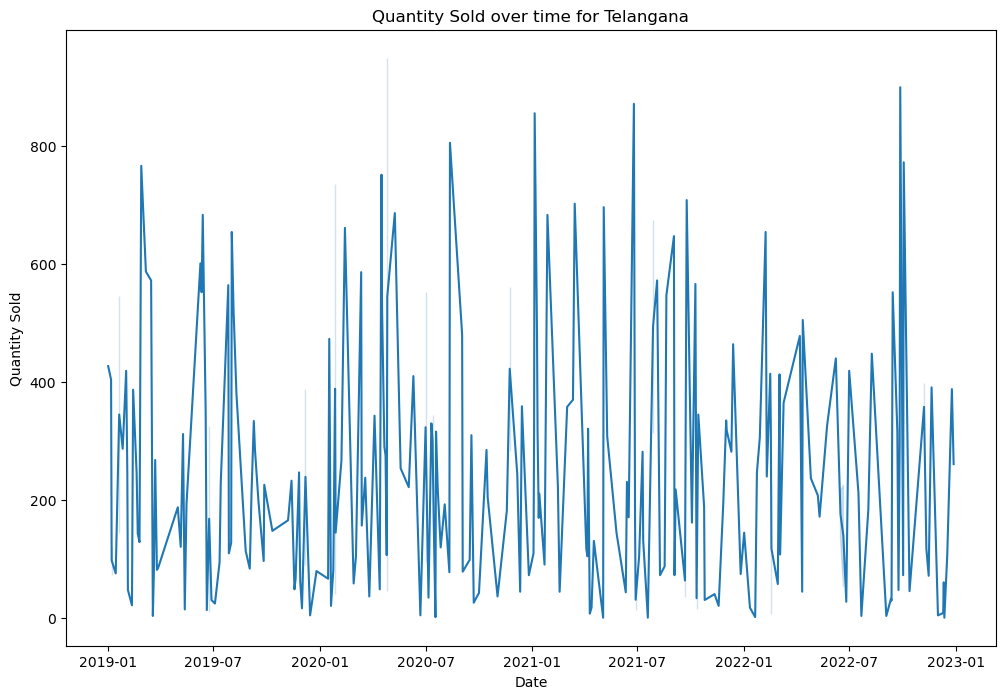

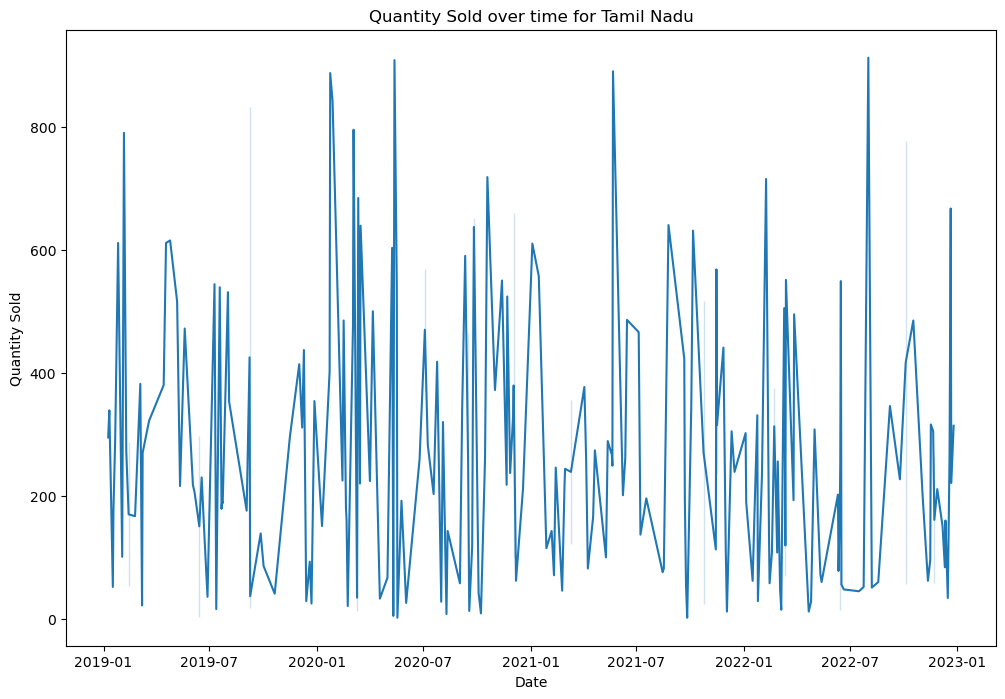

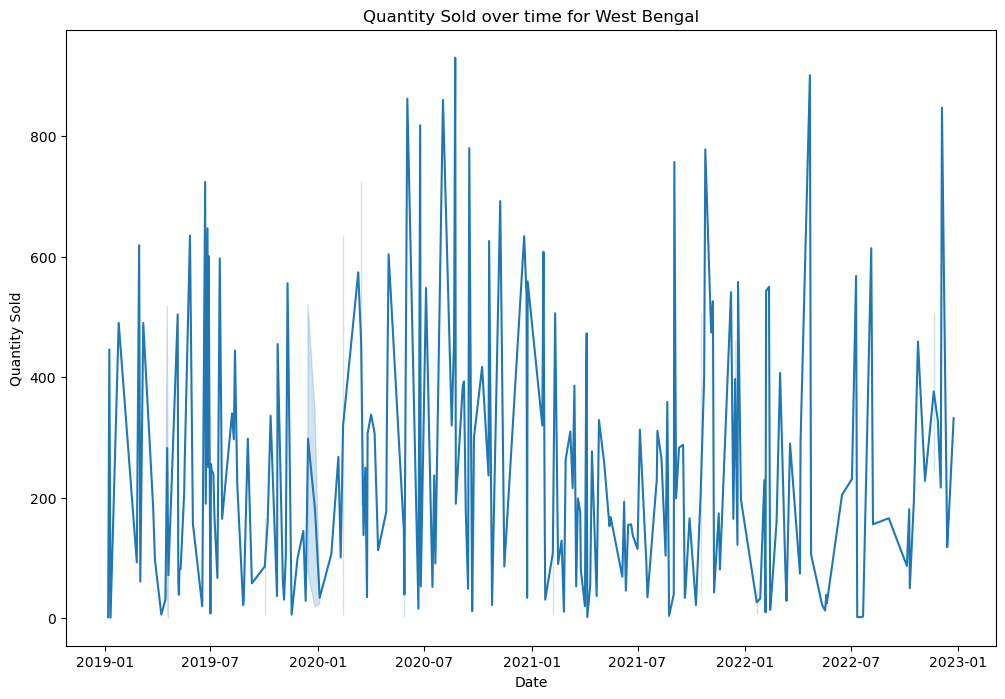

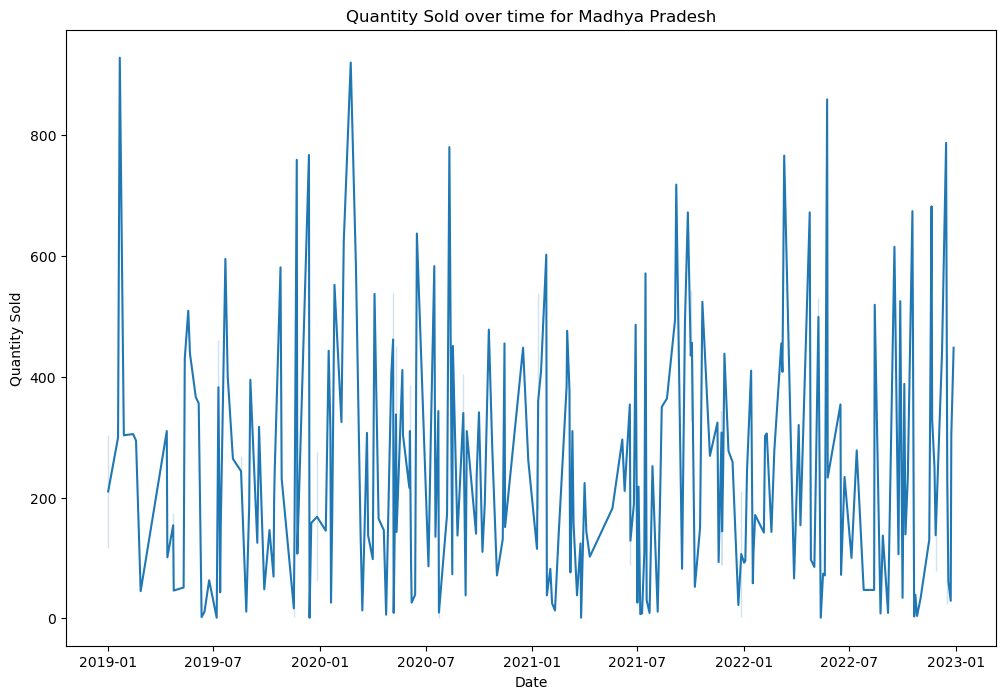

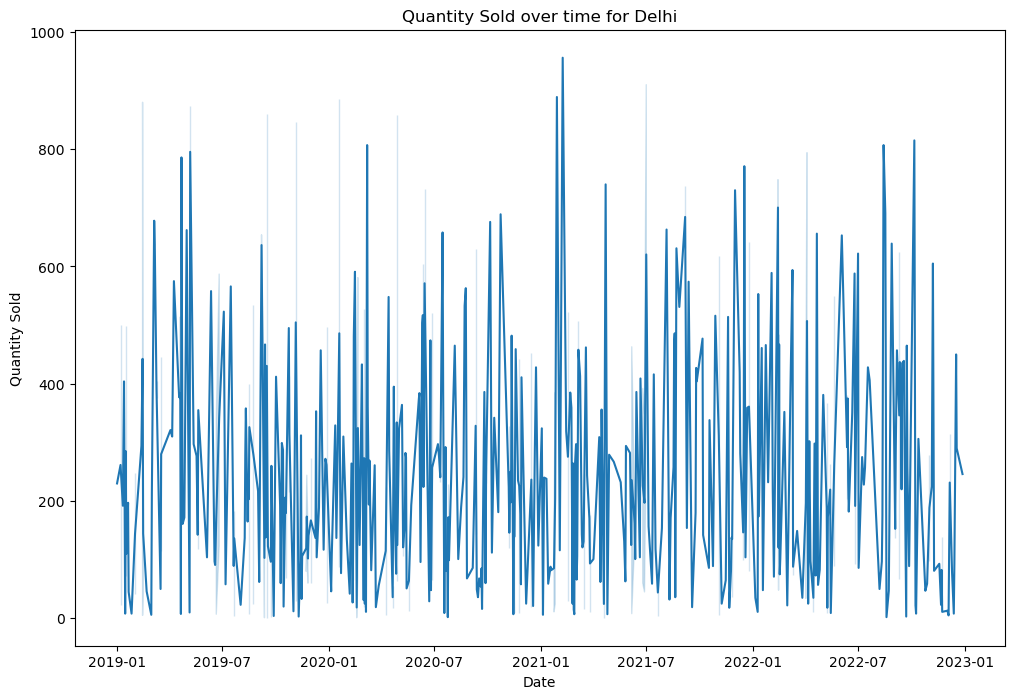

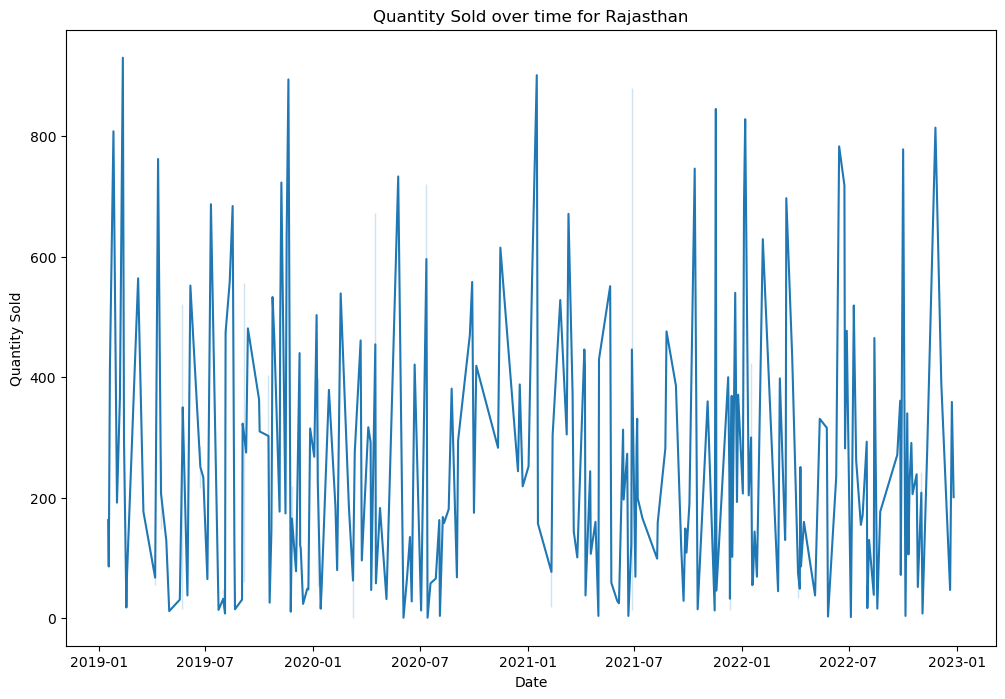

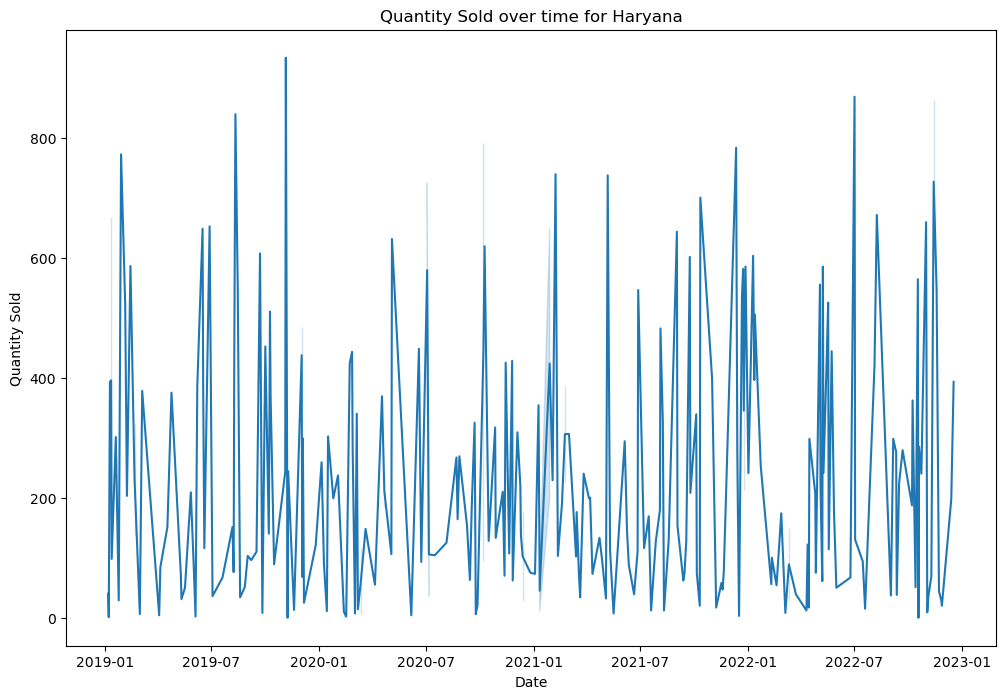

In [130]:
for location in dairy['Location'].unique():
    plt.figure(figsize=(12,8))
    sns.lineplot(x = dairy[dairy['Location'] == location]['Date'],
                 y = dairy['Quantity Sold (liters/kg)'])
    plt.xlabel("Date")
    plt.ylabel("Quantity Sold")
    plt.title("Quantity Sold over time for " + location)
    plt.show()

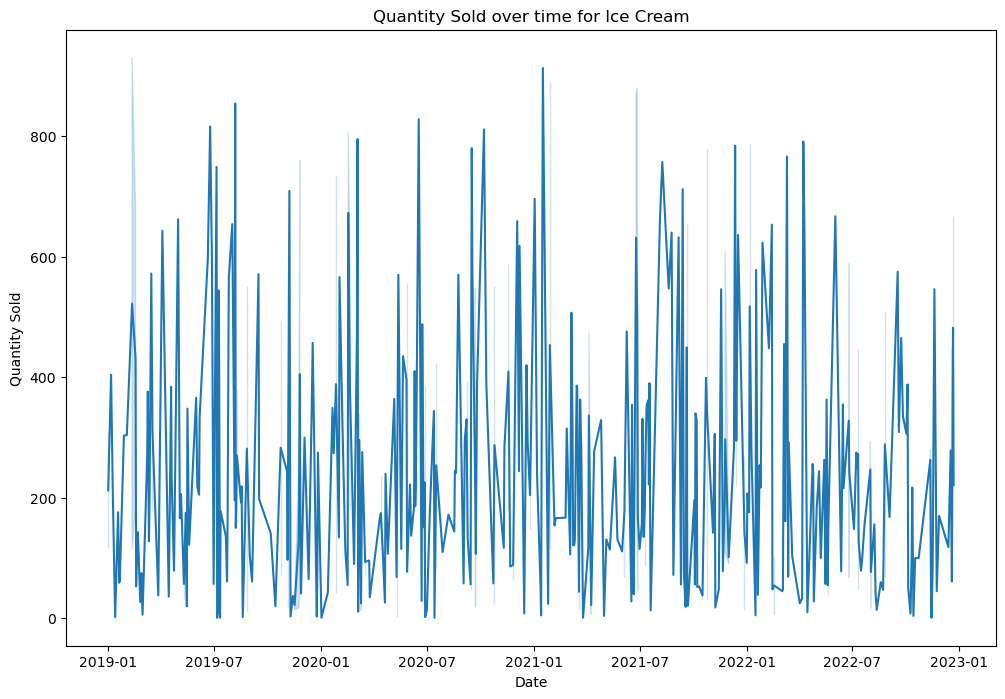

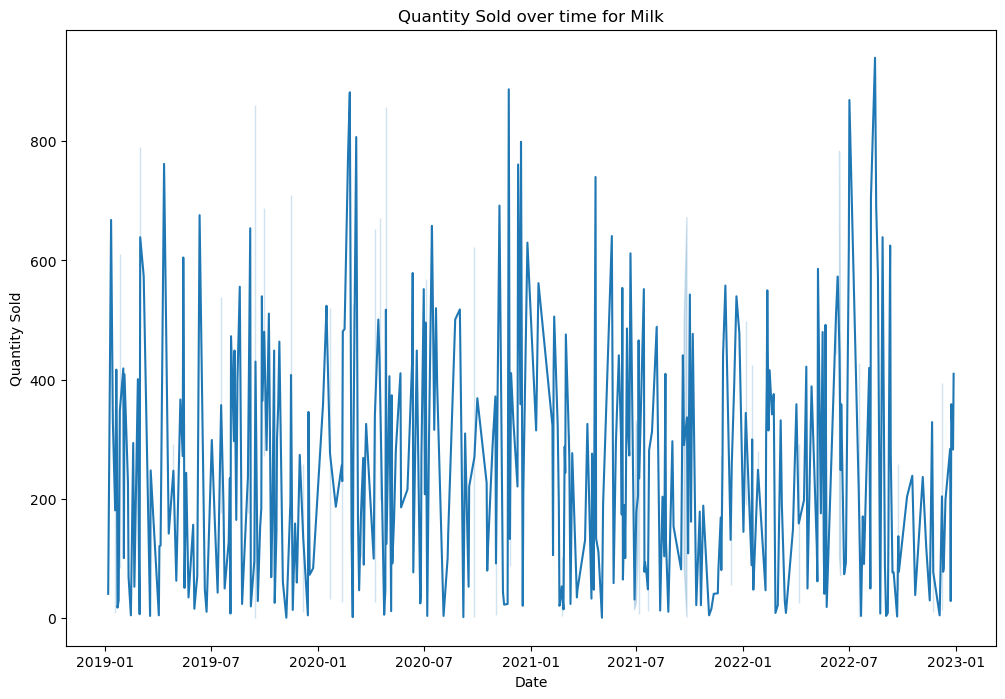

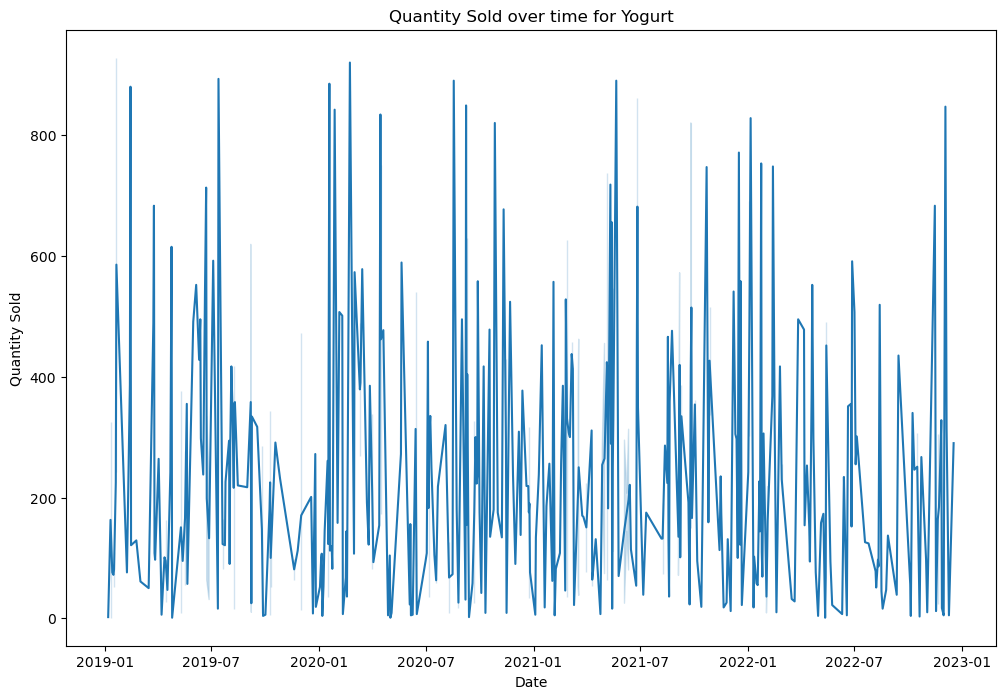

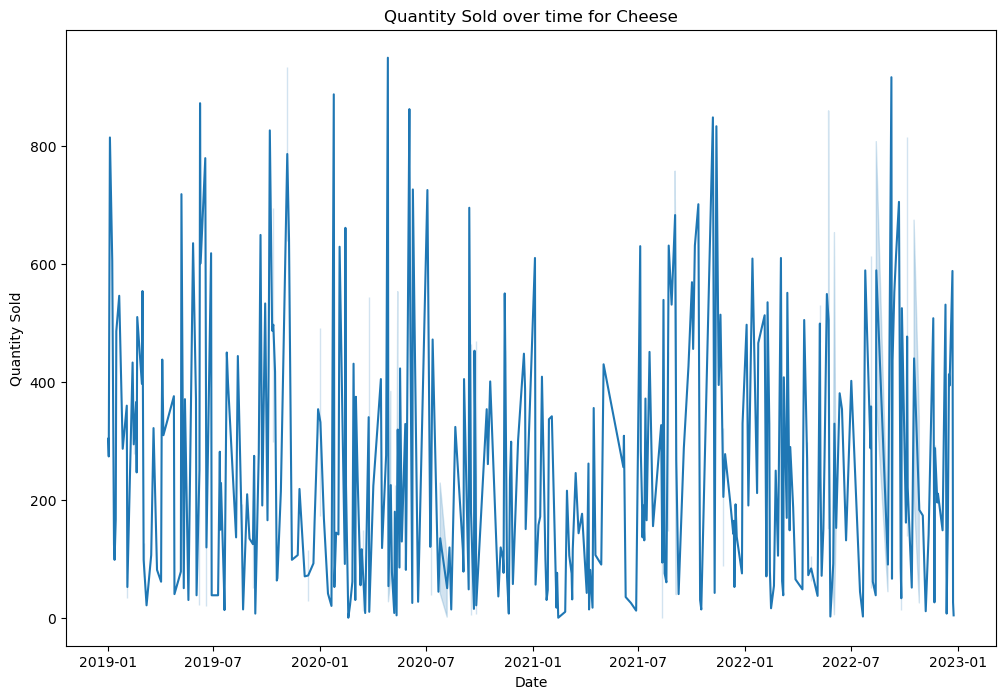

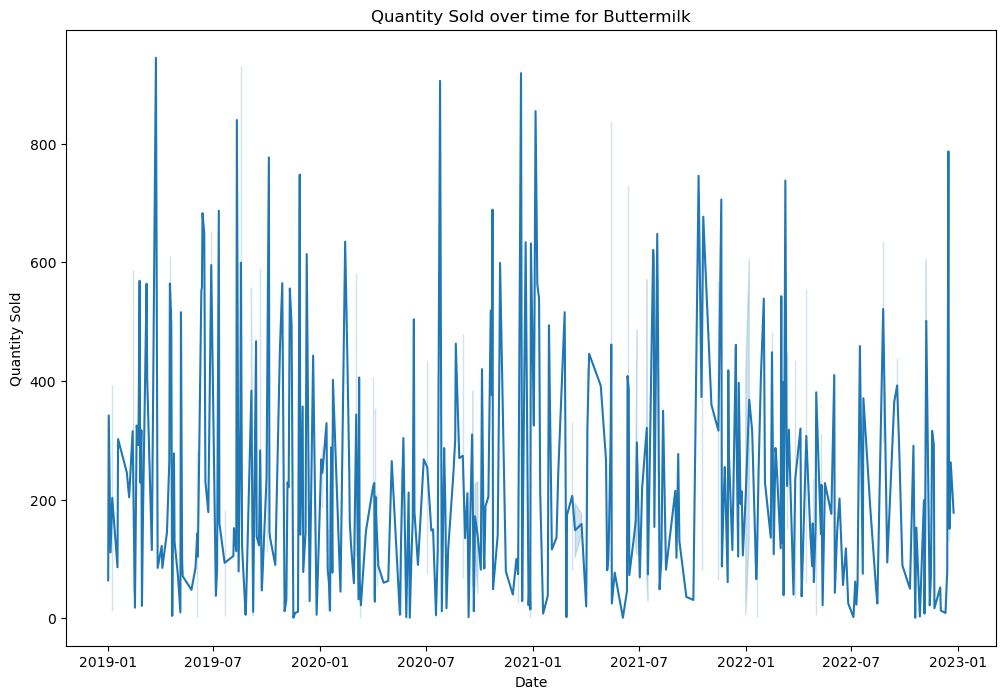

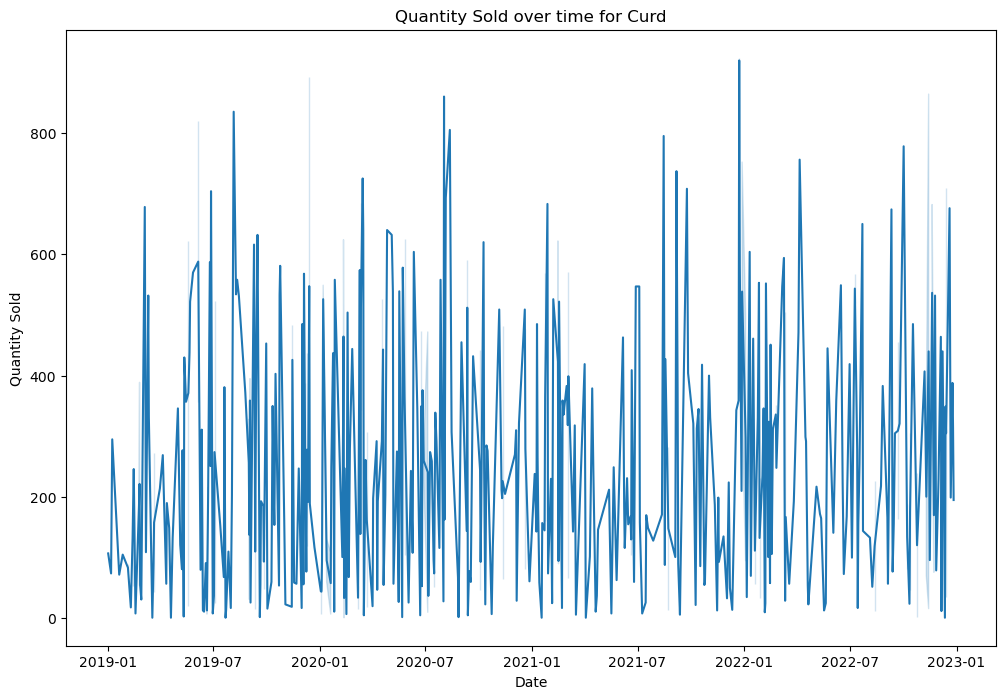

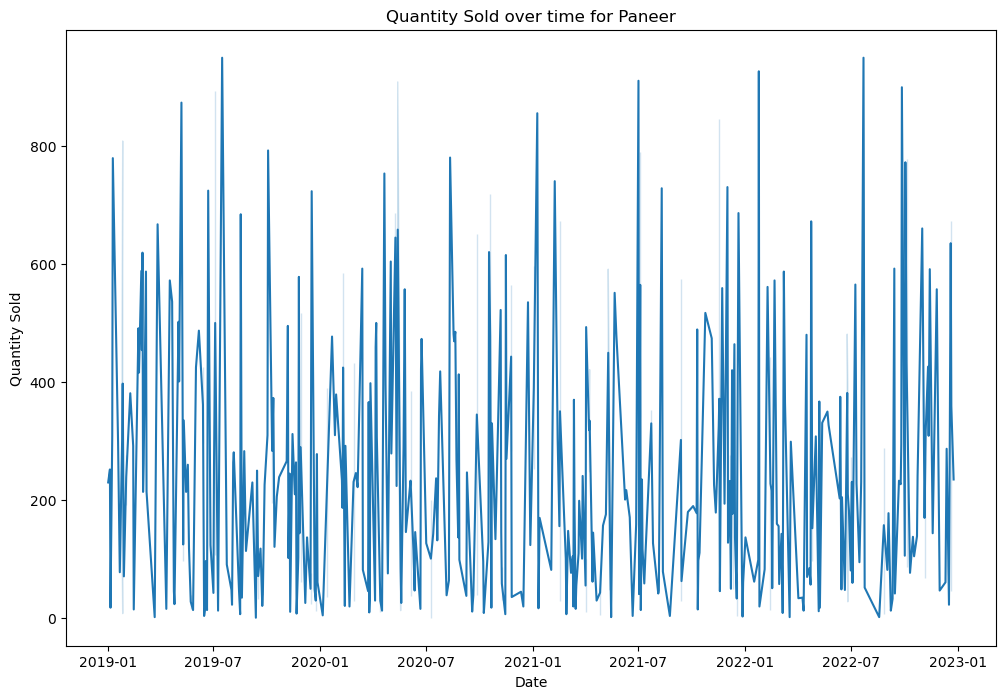

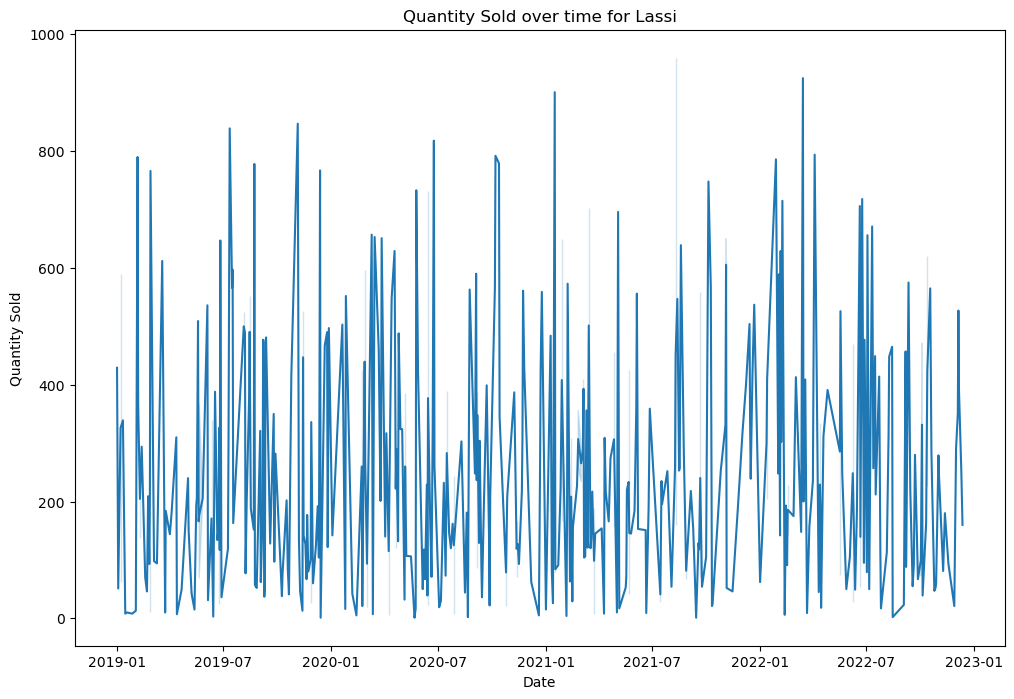

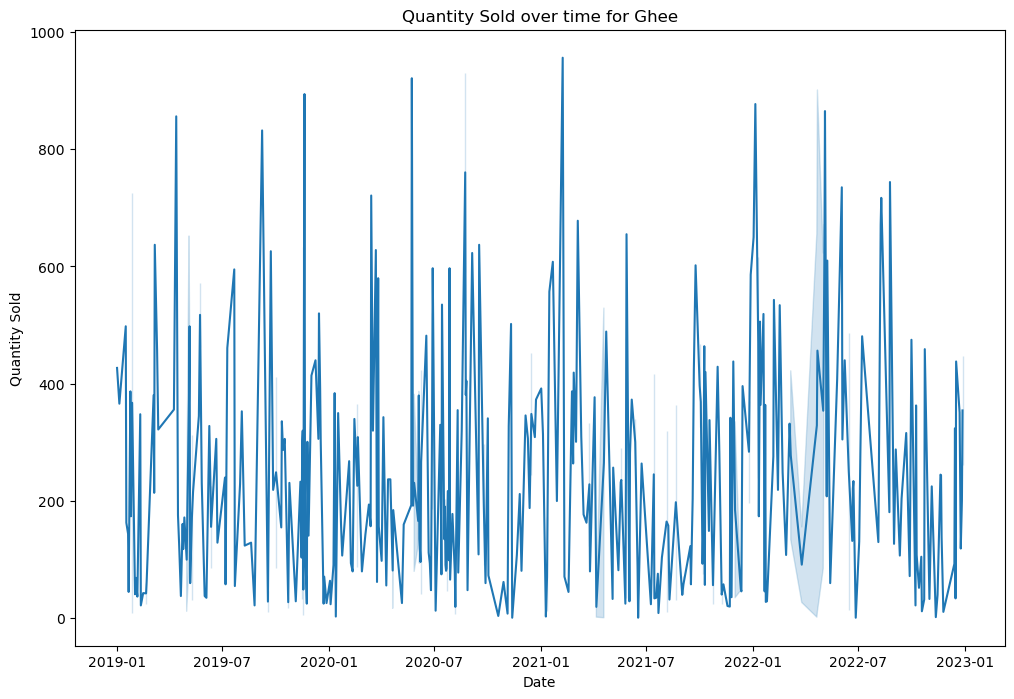

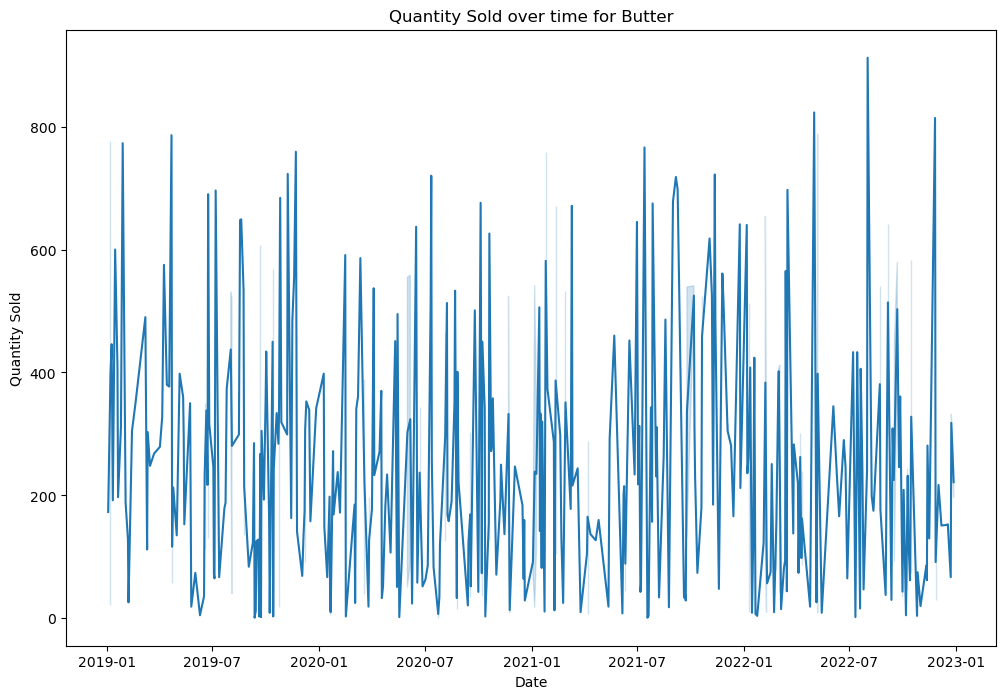

In [132]:
for product in dairy['Product Name'].unique():
    plt.figure(figsize=(12,8))
    sns.lineplot(x = dairy[dairy['Product Name'] == product]['Date'],
                 y = dairy['Quantity Sold (liters/kg)'])
    plt.xlabel("Date")
    plt.ylabel("Quantity Sold")
    plt.title("Quantity Sold over time for " + product)
    plt.show()

In [133]:
import seaborn.objects as so

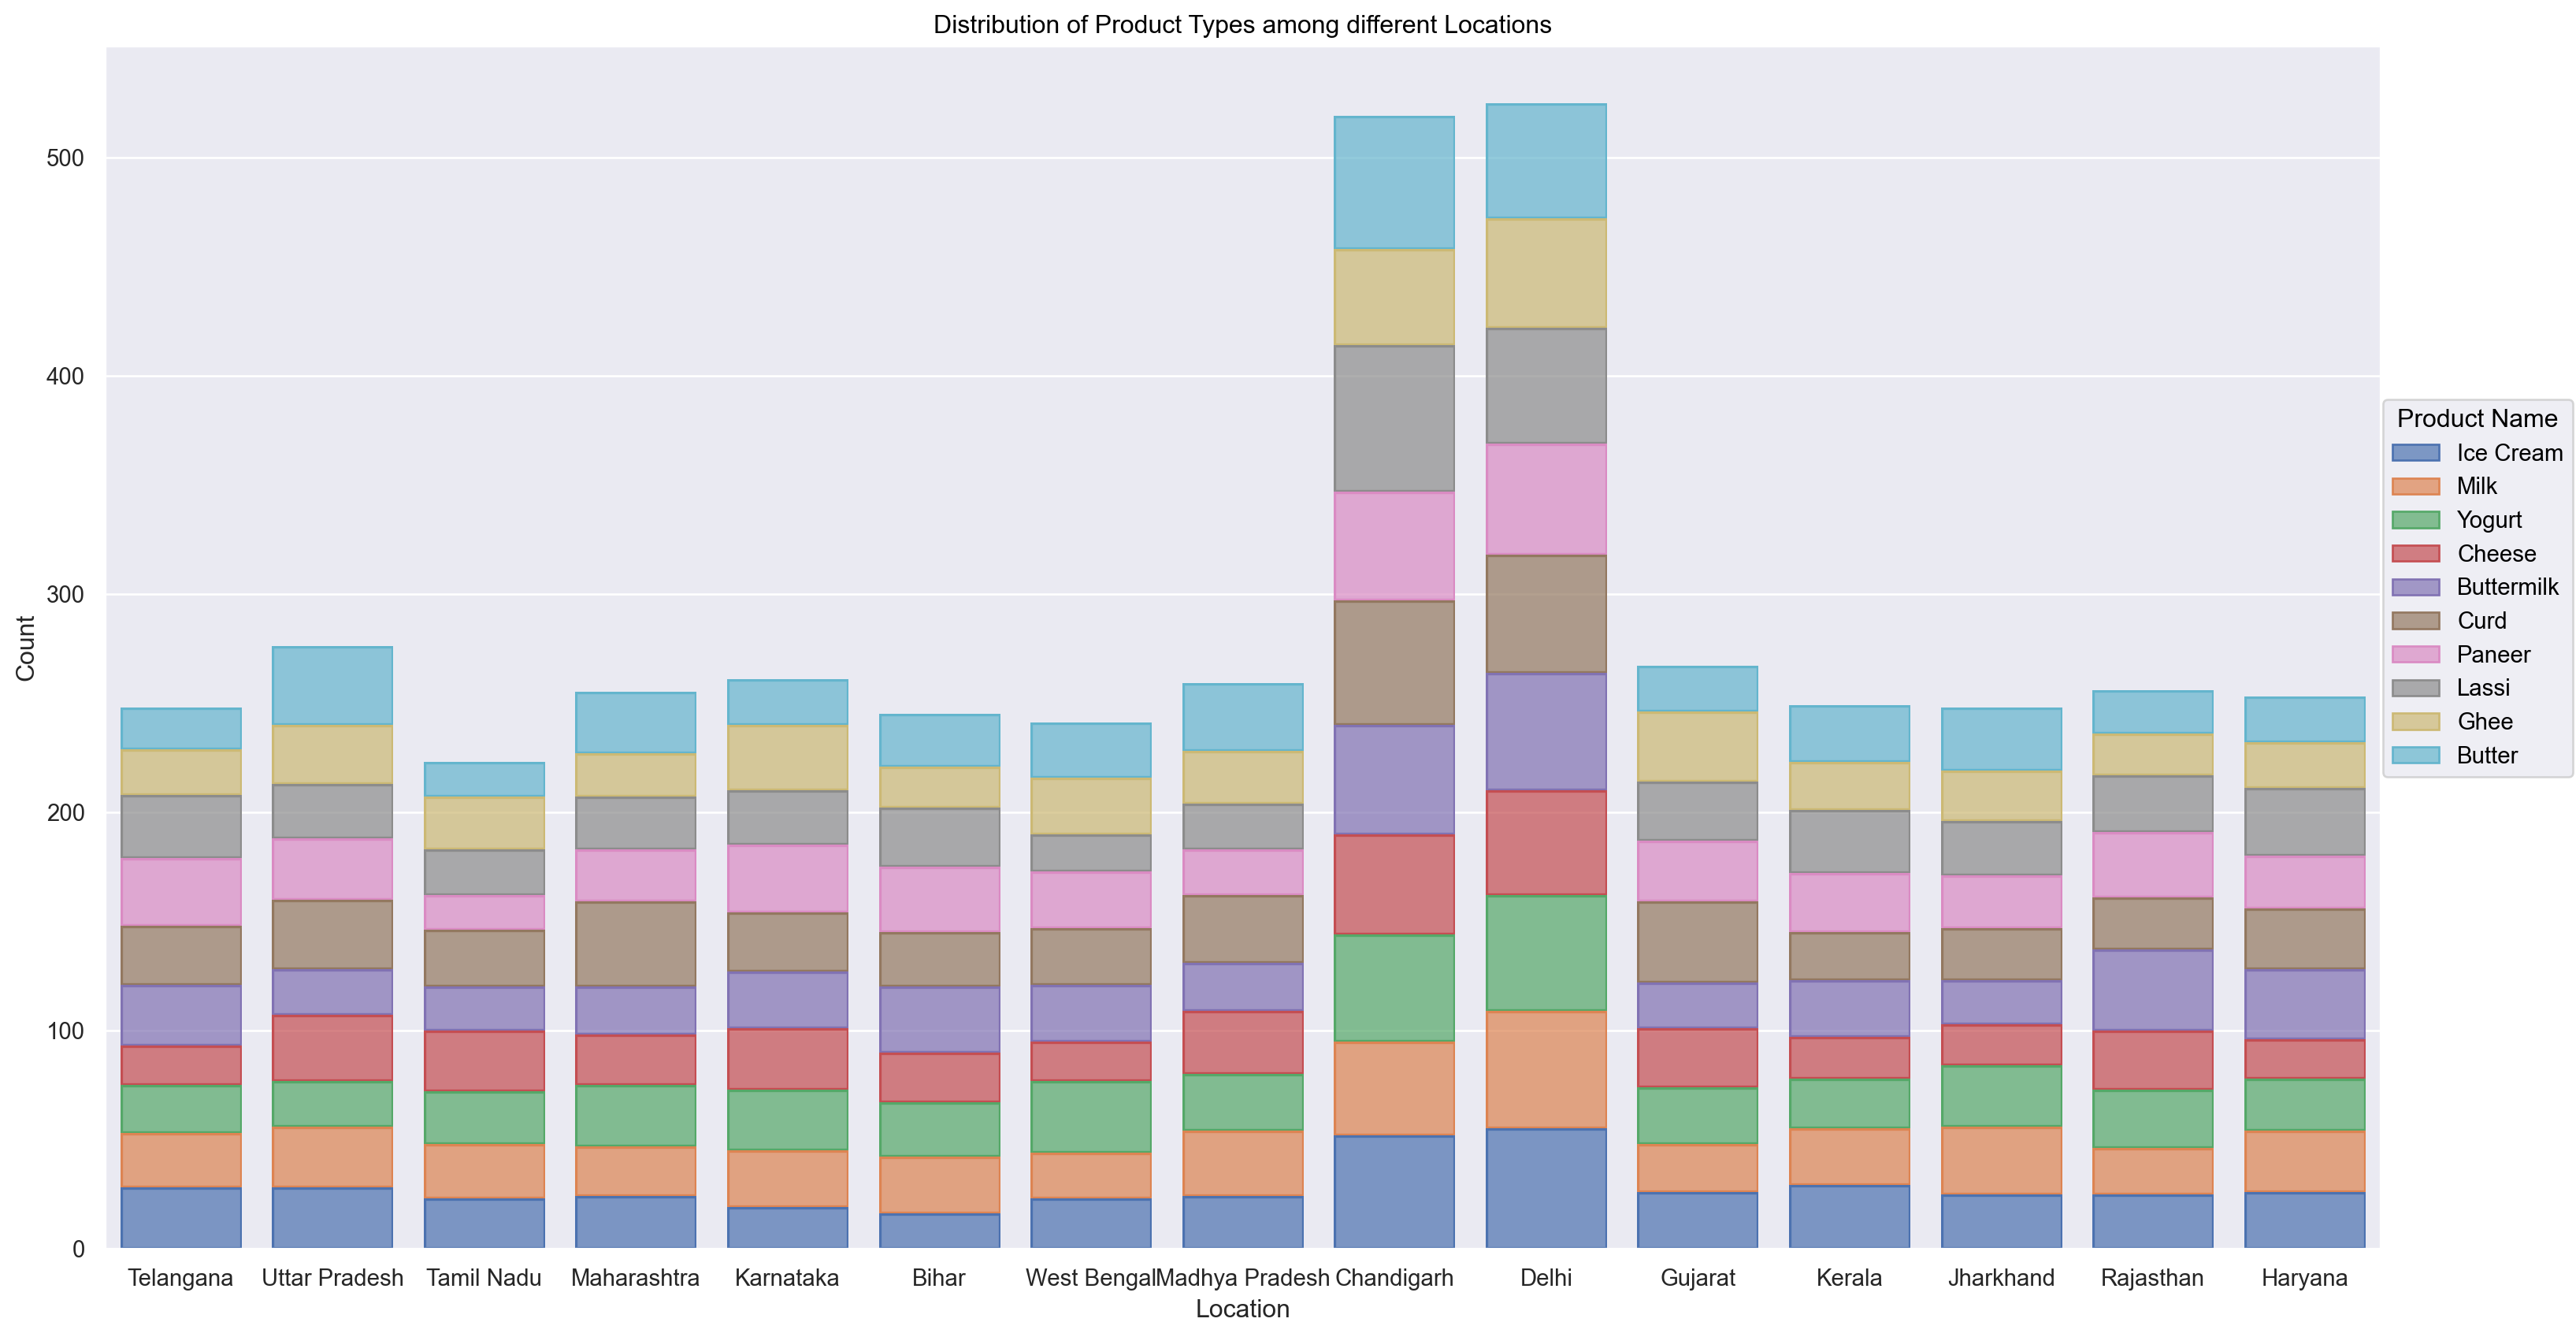

<Figure size 2000x900 with 0 Axes>

In [143]:
plt.figure(figsize = (20,9))
p = so.Plot(dairy, x = "Location", color = "Product Name").add(so.Bar(), so.Count(), so.Stack()).layout(size = (16,9))
p.label(x = "Location", y = "Count", title = "Distribution of Product Types among different Locations")